In [2]:
import pandas as pd
import numpy as np
import gc

In [3]:
df = pd.read_csv("../../data/preprocessed/base.csv", sep=',')
df

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn,cat1,cat2,cat3,brand,sku_size,stock_final
0,201701,10234,20524,0,2,0.05300,0.05300,HC,VAJILLA,Cristalino,Importado,500.0,NaN
1,201701,10032,20524,0,1,0.13628,0.13628,HC,VAJILLA,Cristalino,Importado,500.0,NaN
2,201701,10217,20524,0,1,0.03028,0.03028,HC,VAJILLA,Cristalino,Importado,500.0,NaN
3,201701,10125,20524,0,1,0.02271,0.02271,HC,VAJILLA,Cristalino,Importado,500.0,NaN
4,201701,10012,20524,0,11,1.54452,1.54452,HC,VAJILLA,Cristalino,Importado,500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945813,201912,10105,20853,0,1,0.02230,0.02230,PC,CABELLO,Shampoo Bebe,NIVEA,200.0,1.82373
2945814,201912,10092,20853,0,1,0.00669,0.00669,PC,CABELLO,Shampoo Bebe,NIVEA,200.0,1.82373
2945815,201912,10006,20853,0,7,0.02898,0.02898,PC,CABELLO,Shampoo Bebe,NIVEA,200.0,1.82373
2945816,201912,10018,20853,0,4,0.01561,0.01561,PC,CABELLO,Shampoo Bebe,NIVEA,200.0,1.82373


In [ ]:
df = pd.read_csv("../../data/preprocessed/base.csv", sep=',')
df = df.groupby(by=['periodo', 'product_id']).agg({'tn':'sum'}).reset_index()

In [10]:
df

,periodo,product_id,tn
0,201701,20001,934.77222
1,201701,20002,550.15707
2,201701,20003,1063.45835
3,201701,20004,555.91614
4,201701,20005,494.27011
...,...,...,...
31238,201912,21265,0.05007
31239,201912,21266,0.05121
31240,201912,21267,0.01569
31241,201912,21271,0.00298


In [ ]:
df_prod = df.groupby(by=['product_id']).agg({'tn':'sum'}).reset_index()
df_prod.sort_values(by=['tn'], ascending=False)

,product_id,tn
0,20001,50340.39558
1,20002,36337.25439
2,20003,32004.15274
3,20004,24178.15379
4,20005,23191.21852
...,...,...
1228,21295,0.00699
1229,21296,0.00651
1230,21297,0.00579
1231,21298,0.00573


In [22]:
df_1 = df_prod[df_prod['tn']> 1000]
df_1.to_csv("../../data/preprocessed/mayores_a_1000.csv", sep=",", index=False)

In [23]:
df_1 = df_prod[(df_prod['tn'] >= 500) & (df_prod['tn'] < 1000)]
df_1.to_csv("../../data/preprocessed/entre_500_y_1000.csv", sep=",", index=False)

In [24]:
df_1 = df_prod[(df_prod['tn'] >= 100) & (df_prod['tn'] < 500)]
df_1.to_csv("../../data/preprocessed/entre_100_y_500.csv", sep=",", index=False)

In [25]:
df_1 = df_prod[(df_prod['tn'] >= 1) & (df_prod['tn'] < 100)]
df_1.to_csv("../../data/preprocessed/entre_1_y_100.csv", sep=",", index=False)

In [26]:
df_1 = df_prod[(df_prod['tn'] < 1) ]
df_1.to_csv("../../data/preprocessed/menor_a_1.csv", sep=",", index=False)
df_1.shape

(39, 2)

In [20]:
df_prod[(df_prod['tn'] < 1)]

,product_id,tn
1175,21234,0.86192
1176,21237,0.64274
1178,21239,0.69976
1181,21242,0.78131
1185,21247,0.55726
1199,21265,0.89541
1200,21266,0.94659
1201,21267,0.92835
1202,21268,0.96121
1203,21269,0.87024


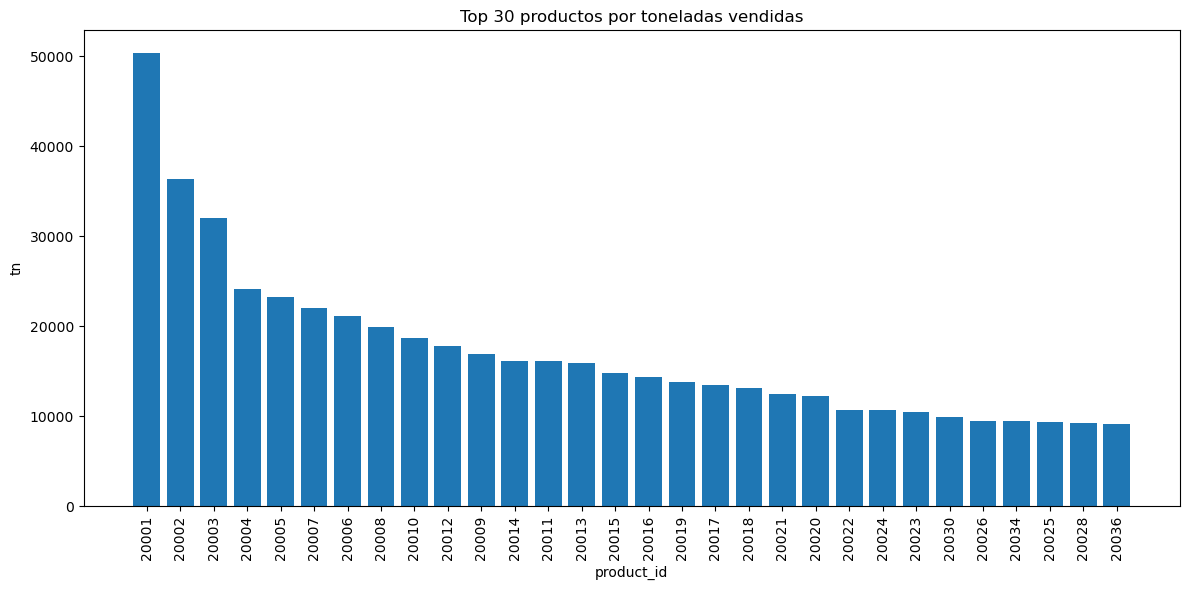

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama df
# Ordenar por tn descendente
df_sorted = df_prod.sort_values('tn', ascending=False).reset_index(drop=True)

# Tomar los 30 principales productos
top_n = 30
top_products = df_sorted.head(top_n)

# Graficar
plt.figure(figsize=(12, 6))
plt.bar(top_products['product_id'].astype(str), top_products['tn'])
plt.xticks(rotation=90)
plt.title(f'Top {top_n} productos por toneladas vendidas')
plt.xlabel('product_id')
plt.ylabel('tn')
plt.tight_layout()
plt.show()


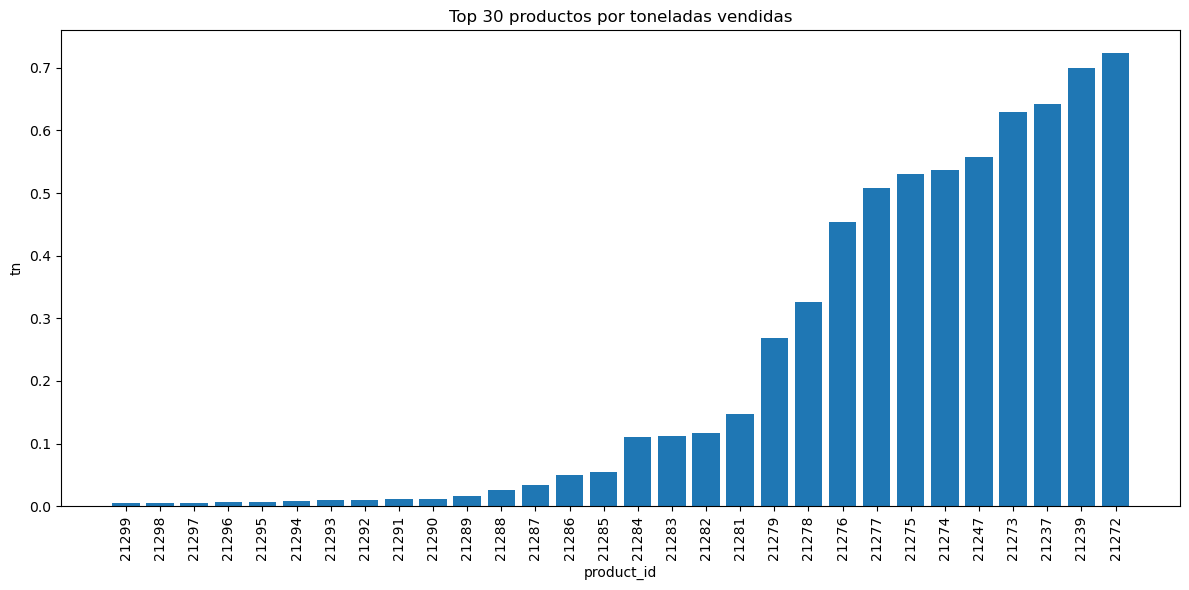

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama df
# Ordenar por tn descendente
df_sorted = df_prod.sort_values('tn', ascending=True).reset_index(drop=True)

# Tomar los 30 principales productos
top_n = 30
top_products = df_sorted.head(top_n)

# Graficar
plt.figure(figsize=(12, 6))
plt.bar(top_products['product_id'].astype(str), top_products['tn'])
plt.xticks(rotation=90)
plt.title(f'Top {top_n} productos por toneladas vendidas')
plt.xlabel('product_id')
plt.ylabel('tn')
plt.tight_layout()
plt.show()


In [113]:
def combinatoria_periodo_producto():
    """
    Devuelve df con combinatoria de todos los productos con todos los periodos.
    """
    
    df = pd.read_csv("../../data/preprocessed/base.csv", sep=',')
    
    df["periodo_dt"] = pd.to_datetime(df["periodo"].astype(str), format="%Y%m")

    periodos = pd.date_range(start=df['periodo_dt'].min(), end=df['periodo_dt'].max(), freq="MS")
    productos = df['product_id'].unique()    
    
    idx = pd.MultiIndex.from_product([productos, periodos], names=['product_id', 'periodo'])
    completo = idx.to_frame(index=False)
        
    del periodos, productos, idx
    gc.collect()
    
    return completo

def getProductos_sinHistoria(meses = 3):
    """
    Devuelve df con productos cuya historia es <= 3 meses.
    """
    df = pd.read_csv("../../data/preprocessed/base.csv", sep=',')
    historia = df.groupby('product_id')['periodo'].agg(['min', 'max']).reset_index()
    historia['fecha_min'] = pd.to_datetime(historia['min'], format='%Y%m')
    historia['fecha_max'] = pd.to_datetime(historia['max'], format='%Y%m')
    historia['meses_diff'] = (
        (historia['fecha_max'].dt.year - historia['fecha_min'].dt.year) * 12 + 
        (historia['fecha_max'].dt.month - historia['fecha_min'].dt.month) + 1  # +1 para incluir ambos extremos
    )
    prod_sin_historia = historia.loc[historia['meses_diff'] <= meses, 'product_id'].tolist()
    del historia, df
    gc.collect()
    return prod_sin_historia


def eliminarProductos_sinNacer(df, data):
    """
    Elimina productos que no tienen periodo de nacimiento: primera venta.
    """
    df["periodo_dt"] = pd.to_datetime(df["periodo"].astype(str), format="%Y%m")
    data["periodo_dt"] = pd.to_datetime(data["periodo"].astype(str), format="%Y%m")
    
    nacimiento_producto = df.groupby("product_id")["periodo_dt"].agg(["min"]).reset_index()
    # Renombrar columna max a muerte_cliente_dt
    nacimiento_producto = nacimiento_producto.rename(columns={'min': 'nacimiento_producto'})

    # Unir con df_final para traer fecha de muerte del cliente
    data = data.merge(nacimiento_producto, on='product_id', how='left')

    # Filtrar filas donde periodo_dt > muerte_cliente_dt
    data = data[data['periodo_dt'] >= data['nacimiento_producto']]

    data.drop(columns=['periodo_dt'], inplace=True)
    del nacimiento_producto
    gc.collect()
    
    return data


def eliminarProductosMuertos(df, data):
    """
    Elimina productos que murieron: última venta.
    """
    df["periodo_dt"] = pd.to_datetime(df["periodo"].astype(str), format="%Y%m")
    data["periodo_dt"] = pd.to_datetime(data["periodo"].astype(str), format="%Y%m")
    
    muerte_producto = df.groupby("product_id")["periodo_dt"].agg(["max"]).reset_index()
    # Renombrar columna max a muerte_producto
    muerte_producto = muerte_producto.rename(columns={'max': 'muerte_producto'})
    

    # Unir con df_final para traer fecha de muerte del cliente
    data = data.merge(muerte_producto, on='product_id', how='left')

    # Filtrar filas donde periodo_dt > muerte_cliente_dt
    data = data[~((data['periodo_dt'] > data['muerte_producto']) & (data['muerte_producto'] < '2019-12-01'))]

    data.drop(columns=['periodo_dt'], inplace=True)
    del muerte_producto
    gc.collect()
    
    return data


def marcarProductosNuevos_3M(data):
    """
    Productos Nuevos = aquellos que tienen menos de 12 meses de historia.
    Sus primeros 3 meses de historia no se tienen en cuenta para predecir.
    En este metodo se tomó la decisión de no eliminarlos, sino marcarlos.
    """
    data["periodo_dt"] = pd.to_datetime(data["periodo"].astype(str), format="%Y%m")
    
    data = data.sort_values(by=['product_id', 'periodo_dt'])
    
    data['mes_n'] = data.groupby('product_id').cumcount() + 1
    
    meses_totales = data.groupby("product_id")['periodo_dt'].count().rename('total_meses').reset_index()
    
    data = data.merge(meses_totales, on='product_id')
    
    data['producto_nuevo'] = (data['total_meses'] <= 12).astype(int)
    
    
    data['ciclo_de_vida_inicial'] = ((data['mes_n'] <= 3) & (data['producto_nuevo'] == 1)).astype(int)
    
    data.drop(columns=['periodo_dt'], inplace=True)
    
    return data

df = pd.read_csv("../../data/preprocessed/base.csv", sep=',')
data = combinatoria_periodo_producto()
data['periodo'] = data['periodo'].dt.year * 100 + data['periodo'].dt.month
prod_sin_historia = getProductos_sinHistoria()
data = data[~data['product_id'].isin(prod_sin_historia)]
#### PRODUCTOS QUE NO NACIERON ####
data = eliminarProductos_sinNacer(df, data)
#### PRODUCTOS QUE MURIERON ####
data = eliminarProductosMuertos(df, data)
#### 3MESES PRODUCTOS NUEVOS: HISTORIA MENOR A 12 MESES ####
data = marcarProductosNuevos_3M(data)
#### MERGE CON PRODUCTOS ####
productos = pd.read_csv("../../data/raw/tb_productos.csv", sep='\t')
productos = productos.drop_duplicates(subset=['product_id'], keep='first')
data = data.merge(productos, how='left', on="product_id")
del productos

#### MERGE CON STOCKS ####
stocks = pd.read_csv("../../data/raw/tb_stocks.csv", sep='\t')
stocks = stocks.groupby(by=["periodo", "product_id"]).agg({"stock_final": "sum"}).reset_index()
data = data.merge(stocks, how='left', on=['periodo', 'product_id'])
del stocks

#### MERGE CON SELLIN ####
sellin = pd.read_csv("../../data/raw/sell-in.csv", sep='\t')
sellin = sellin.groupby(by=["periodo","product_id"]).agg({"tn":"sum", "plan_precios_cuidados":"sum", "cust_request_qty":"sum", "cust_request_tn":"sum"}).reset_index()
data = data.merge(sellin, how='left', on=['periodo', 'product_id'])
del sellin
gc.collect()
#### COMPLETO TN CON CEROS ####
####  ¿cuantos?
print(f"Total de periodos con Nan debido a la combinatoria periodo_x_producto: {data['tn'].isna().sum()}")
#### Lo completo con ceros
data['tn'] = data['tn'].fillna(0)

data

Total de periodos con Nan debido a la combinatoria periodo_x_producto: 276


,product_id,periodo,nacimiento_producto,muerte_producto,mes_n,total_meses,producto_nuevo,ciclo_de_vida_inicial,cat1,cat2,cat3,brand,sku_size,stock_final,tn,plan_precios_cuidados,cust_request_qty,cust_request_tn
0,20001,201701,2017-01-01,2019-12-01,1,36,0,0,HC,ROPA LAVADO,Liquido,ARIEL,3000.0,NaN,934.77222,0.0,479.0,937.72717
1,20001,201702,2017-01-01,2019-12-01,2,36,0,0,HC,ROPA LAVADO,Liquido,ARIEL,3000.0,NaN,798.01620,0.0,432.0,833.72187
2,20001,201703,2017-01-01,2019-12-01,3,36,0,0,HC,ROPA LAVADO,Liquido,ARIEL,3000.0,NaN,1303.35771,0.0,509.0,1330.74697
3,20001,201704,2017-01-01,2019-12-01,4,36,0,0,HC,ROPA LAVADO,Liquido,ARIEL,3000.0,NaN,1069.96130,0.0,279.0,1132.94430
4,20001,201705,2017-01-01,2019-12-01,5,36,0,0,HC,ROPA LAVADO,Liquido,ARIEL,3000.0,NaN,1502.20132,0.0,701.0,1550.68936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31357,21281,201704,2017-02-01,2017-08-01,3,7,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN
31358,21281,201705,2017-02-01,2017-08-01,4,7,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN
31359,21281,201706,2017-02-01,2017-08-01,5,7,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0.09134,0.0,8.0,0.10539
31360,21281,201707,2017-02-01,2017-08-01,6,7,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN


In [91]:

# df = pd.read_csv("../../data/preprocessed/base.csv", sep=',')
# df = df.groupby(by=['periodo', 'product_id']).agg({'tn':'sum'}).reset_index()
# print(df.shape)
products = pd.read_csv("../../data/preprocessed/entre_1_y_100.csv", sep=",")
print(products.shape)
data = data[data['product_id'].isin(products['product_id'].unique())]
print(data.shape)

(453, 2)
(8669, 18)


In [115]:
def target_tn_mas_dos(df):
    """
    Crea una nueva columna target que contiene las ventas en el mes+2.
    Si estoy en enero de 2017 entonces target tendrá las toneladas de marzo de 2017
    """
    # Asegurarte de tener 'periodo_dt' (datetime) en completo
    df['periodo_dt'] = pd.to_datetime(df['periodo'], format='%Y%m')

    # Crear DataFrame auxiliar con tn como target y fecha adelantada
    ventas_futuras = df[['periodo_dt', 'product_id', 'tn']].copy()
    ventas_futuras['periodo_target_dt'] = ventas_futuras['periodo_dt'] - pd.DateOffset(months=2)
    ventas_futuras = ventas_futuras.rename(columns={'tn': 'target'})

    # Merge con completo usando periodo adelantado
    df = df.merge(
        ventas_futuras[['periodo_target_dt', 'product_id', 'target']],
        how='left',
        left_on=['periodo_dt', 'product_id'],
        right_on=['periodo_target_dt', 'product_id']
    )

    # Eliminar columna auxiliar
    df = df.drop(columns=['periodo_target_dt', 'periodo_dt'])
    del ventas_futuras
    gc.collect()
    
    return df

data = target_tn_mas_dos(data)

In [93]:
import pandas as pd
import numpy as np  
import gc
from sklearn.preprocessing import OneHotEncoder
import os


def aplicarOHE(df):
    """
    Aplica OneHotEncoder a las columnas categóricas.
    """
    
    # Seleccionar columnas categóricas
    categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Crear codificador
    encoder = OneHotEncoder(sparse_output=False, drop=None)

    # Ajustar y transformar
    encoded = encoder.fit_transform(df[categoricas])

    # Convertir a DataFrame
    encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categoricas), index=df.index)

    # Unir con el resto del DataFrame
    df_ohe = df.drop(columns=categoricas).join(encoded_df)
    
    # Liberar memoria
    del categoricas, encoded, encoded_df, encoder
    gc.collect()
    
    return df_ohe

##### aplicamos OHE
data = aplicarOHE(data)
data

,product_id,periodo,nacimiento_producto,muerte_producto,mes_n,total_meses,producto_nuevo,ciclo_de_vida_inicial,sku_size,stock_final,...,brand_NIVEA,brand_OFF,brand_SHAMPOO1,brand_SHAMPOO2,brand_SHAMPOO3,brand_SKIN1,brand_TWININGS,brand_VICHY,brand_VIVERE,brand_nan
0,20615,201907,2019-07-01,2019-12-01,1,6,1,1,400.0,16.02735,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20615,201908,2019-07-01,2019-12-01,2,6,1,1,400.0,14.06775,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20615,201909,2019-07-01,2019-12-01,3,6,1,1,400.0,0.00000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20615,201910,2019-07-01,2019-12-01,4,6,1,0,400.0,3.55514,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20615,201911,2019-07-01,2019-12-01,5,6,1,0,400.0,14.32394,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8664,21264,201908,2017-07-01,2019-12-01,26,30,0,0,20.0,0.07166,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8665,21264,201909,2017-07-01,2019-12-01,27,30,0,0,20.0,0.05681,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8666,21264,201910,2017-07-01,2019-12-01,28,30,0,0,20.0,0.11844,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8667,21264,201911,2017-07-01,2019-12-01,29,30,0,0,20.0,0.10544,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [94]:
import pandas as pd
import numpy as np
import os
from calendar import monthrange
import gc
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from scipy.stats import skew
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import calendar
from statsmodels.tsa.seasonal import seasonal_decompose
from neuralprophet import NeuralProphet
from tqdm import tqdm
from tslearn.metrics import cdist_dtw, dtw
from sklearn.cluster import KMeans

def calcular_cantidad_lags(desde, hasta):
    """
    Calcula la cantidad de lags necesarios entre dos fechas.
    """
    # Convertir fechas a formato datetime
    fdesde = pd.to_datetime(str(desde), format='%Y%m')
    fhasta = pd.to_datetime(str(hasta), format='%Y%m')
    
    # Calcular diferencia en meses
    lags = (fhasta.year - fdesde.year) * 12 + (fhasta.month - fdesde.month)
    return lags + 1  # +1 para incluir el mes actual



def get_lags(df, col, hasta=201912):
    """
    Calcula los lags de la columna indicada por 'col' hasta la fecha indicada.
    """
    df = df.sort_values(['product_id', 'periodo'])

    lags = calcular_cantidad_lags(201701, hasta)
    
    # Calcular lags
    for lag in range(1, lags):
        df[f'{col}_lag_{lag}'] = df.groupby('product_id')[col].shift(lag)
    
    # Liberar memoria
    gc.collect()
    
    return df


def get_lagsEspecificos(df, lags=[1, 2, 3, 6, 12, 24], col='tn'):
    """
    Calcula lags específicos de la columna indicada por 'col' hasta la fecha indicada.
    """
    df = df.sort_values(['product_id', 'periodo'])
    
    # Calcular lags específicos
    for lag in lags:
        df[f'{col}_lag_{lag}'] = df.groupby('product_id')[col].shift(lag)
    
    # Liberar memoria
    gc.collect()
    
    return df


def get_delta_lags(df, col, hasta=201912):
    """
    Calcula los delta lags (diferencias entre lags consecutivos) para la columna 'col'.
    """
    
    # Ordenar
    df = df.sort_values(['product_id', 'periodo'])
    
    
    lags = calcular_cantidad_lags(201701, hasta)

    # Calcular delta lags
    for i in range(1, lags):
        lag_actual = i
        lag_anterior = i - 1
        if (lag_anterior == 0): continue
        df[f'{col}_delta_lag_{lag_actual}'] = df[f'{col}_lag_{lag_actual}'] - df[f'{col}_lag_{lag_anterior}']
    
    return df


def get_delta_lags_especificos(df, lags=[1, 2, 3, 6, 12, 24], col='tn'):
    """
    Calcula los delta lags (diferencias entre lags específicos) para la columna 'col'.
    """
    
    # Ordenar
    df = df.sort_values(['product_id', 'periodo'])
    
    # Calcular delta lags específicos
    for i in range(1, len(lags)):
        lag_actual = lags[i]
        lag_anterior = lags[i - 1]
        if (lag_anterior == 0): continue
        df[f'{col}_delta_lag_{lag_actual}'] = df[f'{col}_lag_{lag_actual}'] - df[f'{col}_lag_{lag_anterior}']
    
    return df


def get_rolling_means(df, col, hasta=201912):
    """
    Calcula medias móviles mensuales de la columna 'col' para las ventanas especificadas,
    usando solo datos hasta el período 'hasta'.
    """
    # Filtrar y ordenar
    df_historico = df[df['periodo'].astype(int) <= hasta].copy()
    df_historico = df_historico.sort_values(['product_id', 'periodo'])
    
    ventanas = calcular_cantidad_lags(201701, hasta)
    ventanas = ventanas + 1
    
    # Calcular medias móviles para cada ventana
    for ventana in range(1, ventanas):
        df_historico[f'{col}_rolling_mean_{ventana}'] = (
            df_historico.groupby('product_id')[col]
            .rolling(window=ventana, min_periods=ventana)
            .mean()
            .reset_index(level=0, drop=True)
        )
    
    # Combinar con el DataFrame original
    df = df.merge(
        df_historico[['product_id', 'periodo'] + [f'{col}_rolling_mean_{v}' for v in range(1, ventanas)]],
        on=['product_id', 'periodo'],
        how='left'
    )
    
    return df


def get_rolling_means_especificos(df, lags=[1, 2, 3, 6, 12, 24], col='tn'):
    """
    Calcula medias móviles mensuales de la columna 'col' para las ventanas especificadas,
    usando solo datos hasta el período 'hasta'.
    """
    # Filtrar y ordenar
    df_historico = df.copy()
    df_historico = df_historico.sort_values(['product_id', 'periodo'])
    
    # Calcular medias móviles para cada ventana específica
    for ventana in lags:
        df_historico[f'{col}_rolling_mean_{ventana}'] = (
            df_historico.groupby('product_id')[col]
            .rolling(window=ventana, min_periods=ventana)
            .mean()
            .reset_index(level=0, drop=True)
        )
    
    # Combinar con el DataFrame original
    df = df.merge(
        df_historico[['product_id', 'periodo'] + [f'{col}_rolling_mean_{v}' for v in lags]],
        on=['product_id', 'periodo'],
        how='left'
    )
    
    return df


def get_rolling_stds(df, col, hasta=201912):
    """
    Calcula desvíos estándar móviles mensuales de la columna 'col',
    usando solo datos hasta el período 'hasta'.
    """
    # Filtrar y ordenar
    df_historico = df[df['periodo'].astype(int) <= hasta].copy()
    df_historico = df_historico.sort_values(['product_id', 'periodo'])
    
    ventanas = calcular_cantidad_lags(201701, hasta)
    ventanas = ventanas + 1
    
    # Calcular desvíos estándar móviles para cada ventana
    for ventana in range(1, ventanas):
        df_historico[f'{col}_rolling_std_{ventana}'] = (
            df_historico.groupby('product_id')[col]
            .rolling(window=ventana, min_periods=ventana)  # min_periods=ventana para evitar valores con datos insuficientes
            .std(ddof=0)  # ddof=0 para desviación estándar poblacional
            .reset_index(level=0, drop=True)
        )
    
    # Combinar con el DataFrame original
    df = df.merge(
        df_historico[['product_id', 'periodo'] + [f'{col}_rolling_std_{v}' for v in range(1, ventanas)]],
        on=['product_id', 'periodo'],
        how='left'
    )
    
    return df


def get_rolling_stds_especificos(df, lags=[1, 2, 3, 6, 12, 24], col='tn'):
    """
    Calcula desvíos estándar móviles mensuales de la columna 'col' para las ventanas especificadas,
    usando solo datos hasta el período 'hasta'.
    """
    # Filtrar y ordenar
    df_historico = df.copy()
    df_historico = df_historico.sort_values(['product_id', 'periodo'])
    
    # Calcular desvíos estándar móviles para cada ventana específica
    for ventana in lags:
        df_historico[f'{col}_rolling_std_{ventana}'] = (
            df_historico.groupby('product_id')[col]
            .rolling(window=ventana, min_periods=ventana)  # min_periods=ventana para evitar valores con datos insuficientes
            .std(ddof=0)  # ddof=0 para desviación estándar poblacional
            .reset_index(level=0, drop=True)
        )
    
    # Combinar con el DataFrame original
    df = df.merge(
        df_historico[['product_id', 'periodo'] + [f'{col}_rolling_std_{v}' for v in lags]],
        on=['product_id', 'periodo'],
        how='left'
    )
    
    return df


def get_rolling_medians(df, col, hasta=201912):
    """
    Calcula medianas móviles mensuales de la columna 'col' para las ventanas especificadas,
    usando solo datos hasta el período 'hasta'.
    """
    # Filtrar y ordenar
    df_historico = df[df['periodo'].astype(int) <= hasta].copy()
    df_historico = df_historico.sort_values(['product_id', 'periodo'])
    
    ventanas = calcular_cantidad_lags(201701, hasta)
    ventanas = ventanas + 1
    
    # Calcular medianas móviles para cada ventana
    for ventana in range(1, ventanas):
        df_historico[f'{col}_rolling_median_{ventana}'] = (
            df_historico.groupby('product_id')[col]
            .rolling(window=ventana, min_periods=ventana)
            .median()  # Cambio clave: usando median() en lugar de mean()
            .reset_index(level=0, drop=True)
        )
    
    # Combinar con el DataFrame original
    df = df.merge(
        df_historico[['product_id', 'periodo'] + [f'{col}_rolling_median_{v}' for v in range(1, ventanas)]],
        on=['product_id', 'periodo'],
        how='left'
    )
    
    return df


def get_rolling_medians_especificos(df, lags=[1, 2, 3, 6, 12, 24], col='tn'):
    """
    Calcula medianas móviles mensuales de la columna 'col' para las ventanas especificadas,
    usando solo datos hasta el período 'hasta'.
    """
    # Filtrar y ordenar
    df_historico = df.copy()
    df_historico = df_historico.sort_values(['product_id', 'periodo'])
    
    # Calcular medianas móviles para cada ventana específica
    for ventana in lags:
        df_historico[f'{col}_rolling_median_{ventana}'] = (
            df_historico.groupby('product_id')[col]
            .rolling(window=ventana, min_periods=ventana)
            .median()  # Cambio clave: usando median() en lugar de mean()
            .reset_index(level=0, drop=True)
        )
    
    # Combinar con el DataFrame original
    df = df.merge(
        df_historico[['product_id', 'periodo'] + [f'{col}_rolling_median_{v}' for v in lags]],
        on=['product_id', 'periodo'],
        how='left'
    )
    
    return df


def get_rolling_mins(df, col, hasta=201912):
    """
    Calcula mínimos móviles mensuales de la columna 'col',
    usando solo datos hasta el período 'hasta'.
    """
    # Filtrar y ordenar
    df_historico = df[df['periodo'].astype(int) <= hasta].copy()
    df_historico = df_historico.sort_values(['product_id', 'periodo'])
    
    ventanas = calcular_cantidad_lags(201701, hasta)
    ventanas = ventanas + 1
    
    # Calcular mínimos móviles para cada ventana
    for ventana in range(1, ventanas):
        df_historico[f'{col}_rolling_min_{ventana}'] = (
            df_historico.groupby('product_id')[col]
            .rolling(window=ventana, min_periods=ventana)  # min_periods=ventana para NaN con datos insuficientes
            .min()
            .reset_index(level=0, drop=True)
        )
    
    # Combinar con el DataFrame original
    df = df.merge(
        df_historico[['product_id', 'periodo'] + [f'{col}_rolling_min_{v}' for v in range(1, ventanas)]],
        on=['product_id', 'periodo'],
        how='left'
    )
    
    
    return df

def get_rolling_mins_especificos(df, lags=[1, 2, 3, 6, 12, 24], col='tn'):  
    """
    Calcula mínimos móviles mensuales de la columna 'col' para las ventanas especificadas,
    usando solo datos hasta el período 'hasta'.
    """
    # Filtrar y ordenar
    df_historico = df.copy()
    df_historico = df_historico.sort_values(['product_id', 'periodo'])
    
    # Calcular mínimos móviles para cada ventana específica
    for ventana in lags:
        df_historico[f'{col}_rolling_min_{ventana}'] = (
            df_historico.groupby('product_id')[col]
            .rolling(window=ventana, min_periods=ventana)  # min_periods=ventana para NaN con datos insuficientes
            .min()
            .reset_index(level=0, drop=True)
        )
    
    # Combinar con el DataFrame original
    df = df.merge(
        df_historico[['product_id', 'periodo'] + [f'{col}_rolling_min_{v}' for v in lags]],
        on=['product_id', 'periodo'],
        how='left'
    )
    
    return df

def get_rolling_maxs(df, col, hasta=201912):
    """
    Calcula máximos móviles mensuales de la columna 'col',
    usando solo datos hasta el período 'hasta'.
    """
    # Filtrar y ordenar
    df_historico = df[df['periodo'].astype(int) <= hasta].copy()
    df_historico = df_historico.sort_values(['product_id', 'periodo'])
    
    ventanas = calcular_cantidad_lags(201701, hasta)
    ventanas = ventanas + 1
    
    # Calcular mínimos móviles para cada ventana
    for ventana in range(1, ventanas):
        df_historico[f'{col}_rolling_max_{ventana}'] = (
            df_historico.groupby('product_id')[col]
            .rolling(window=ventana, min_periods=ventana)  # min_periods=ventana para NaN con datos insuficientes
            .max()
            .reset_index(level=0, drop=True)
        )
    
    # Combinar con el DataFrame original
    df = df.merge(
        df_historico[['product_id', 'periodo'] + [f'{col}_rolling_max_{v}' for v in range(1, ventanas)]],
        on=['product_id', 'periodo'],
        how='left'
    )
    
    
    return df


def get_rolling_maxs_especificos(df, lags=[1, 2, 3, 6, 12, 24], col='tn'):
    """
    Calcula máximos móviles mensuales de la columna 'col' para las ventanas especificadas,
    usando solo datos hasta el período 'hasta'.
    """
    # Filtrar y ordenar
    df_historico = df.copy()
    df_historico = df_historico.sort_values(['product_id', 'periodo'])
    
    # Calcular máximos móviles para cada ventana específica
    for ventana in lags:
        df_historico[f'{col}_rolling_max_{ventana}'] = (
            df_historico.groupby('product_id')[col]
            .rolling(window=ventana, min_periods=ventana)  # min_periods=ventana para NaN con datos insuficientes
            .max()
            .reset_index(level=0, drop=True)
        )
    
    # Combinar con el DataFrame original
    df = df.merge(
        df_historico[['product_id', 'periodo'] + [f'{col}_rolling_max_{v}' for v in lags]],
        on=['product_id', 'periodo'],
        how='left'
    )
    
    return df


def get_rolling_skewness(df, col, hasta=201912):
    """
    Calcula el skewness móvil mensual de la columna 'col' para ventanas especificadas,
    usando solo datos hasta el período 'hasta'.
    
    Args:
        df (pd.DataFrame): DataFrame con columnas 'product_id', 'periodo' y 'col'.
        col (str): Nombre de la columna a analizar.
        hasta (int): Fecha límite en formato YYYYMM (ej: 201912 para diciembre 2019).
    
    Returns:
        pd.DataFrame: DataFrame original con columnas añadidas de skewness móvil.
    """
    # Filtrar y ordenar datos históricos
    df_historico = df[df['periodo'].astype(int) <= hasta].copy()
    df_historico = df_historico.sort_values(['product_id', 'periodo'])
    
    # Calcular número de ventanas posibles
    ventanas = calcular_cantidad_lags(201701, hasta) + 1
    
    # Calcular skewness móvil para cada ventana
    for ventana in range(1, ventanas):
        df_historico[f'{col}_rolling_skew_{ventana}'] = (
            df_historico.groupby('product_id')[col]
            .rolling(window=ventana, min_periods=ventana)
            .apply(skew, raw=True)  # Usamos scipy.stats.skew
            .reset_index(level=0, drop=True)
        )
    
    # Combinar con el DataFrame original
    df = df.merge(
        df_historico[['product_id', 'periodo'] + [f'{col}_rolling_skew_{v}' for v in range(1, ventanas)]],
        on=['product_id', 'periodo'],
        how='left'
    )
    
    return df


def get_rolling_skewness_especificos(df, lags=[1, 2, 3, 6, 12, 24], col='tn'):
    """
    Calcula el skewness móvil mensual de la columna 'col' para ventanas específicas,
    usando solo datos hasta el período 'hasta'.
    
    Args:
        df (pd.DataFrame): DataFrame con columnas 'product_id', 'periodo' y 'col'.
        lags (list): Lista de ventanas específicas para calcular skewness.
        col (str): Nombre de la columna a analizar.
    
    Returns:
        pd.DataFrame: DataFrame original con columnas añadidas de skewness móvil.
    """
    # Filtrar y ordenar datos históricos
    df_historico = df.copy()
    df_historico = df_historico.sort_values(['product_id', 'periodo'])
    
    # Calcular skewness móvil para cada ventana específica
    for ventana in lags:
        df_historico[f'{col}_rolling_skew_{ventana}'] = (
            df_historico.groupby('product_id')[col]
            .rolling(window=ventana, min_periods=ventana)
            .apply(skew, raw=True)  # Usamos scipy.stats.skew
            .reset_index(level=0, drop=True)
        )
    
    # Combinar con el DataFrame original
    df = df.merge(
        df_historico[['product_id', 'periodo'] + [f'{col}_rolling_skew_{v}' for v in lags]],
        on=['product_id', 'periodo'],
        how='left'
    )
    
    return df


def get_autocorrelaciones(df, col, hasta=201912):
    """
    Calcula autocorrelaciones para cada combinación de producto y periodo,
    considerando todos los lags posibles hasta la fecha límite.
    """
    # Ordenar por producto y periodo
    df = df.sort_values(['product_id', 'periodo'])
    
    # Lista para almacenar resultados
    resultados = []
    
    for (producto, periodo), grupo in df.groupby(['product_id', 'periodo']):
        # Filtrar datos históricos hasta el periodo actual (inclusive)
        datos_historicos = df[
            (df['product_id'] == producto) & 
            (df['periodo'] <= periodo)
        ][col].dropna()
        
        # Calcular número máximo de lags posibles (periodos disponibles - 1)
        max_lags_posibles = len(datos_historicos) - 1
        max_lags_posibles = max(max_lags_posibles, 0)  # Asegurar no negativo
        
        # Diccionario para este registro
        registro = {
            'product_id': producto,
            'periodo': periodo
        }
        
        # Calcular autocorrelación para cada lag posible
        for lag in range(1, max_lags_posibles + 1):
            autocorr = datos_historicos.autocorr(lag=lag)
            registro[f'autocorr_lag_{lag}'] = autocorr
        
        resultados.append(registro)
    
    # Convertir a DataFrame y rellenar NaNs para lags no disponibles
    df_resultado = pd.DataFrame(resultados)
    df = df.merge(df_resultado, on=['product_id', 'periodo'], how='left')
    
    
    return df


In [95]:
data = get_lags(data, "tn", 201912)
data = get_delta_lags(data, "tn", 201912)
data = get_rolling_means(data, "tn", 201912)
data = get_rolling_stds(data, "tn", 201912)
data = get_rolling_mins(data, "tn", 201912)
data = get_rolling_maxs(data, "tn", 201912)
data = get_rolling_skewness(data, "tn", 201912)
data = get_autocorrelaciones(data, "tn", 201912)
data = get_rolling_medians(data, "tn", 201912)


WARNING - (py.warnings._showwarnmsg) - c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\window\rolling.py:1535: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return window_func(values, begin, end, min_periods)

WARNING - (py.warnings._showwarnmsg) - c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\window\rolling.py:1535: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return window_func(values, begin, end, min_periods)

WARNING - (py.warnings._showwarnmsg) - c:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)

WARNING - (py.warnings._showwarnmsg) - c:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:

In [96]:
import pandas as pd
import numpy as np
import optuna
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from optuna.storages import RDBStorage
from optuna.artifacts import FileSystemArtifactStore, upload_artifact
import os
import json

def guardar_hiperparametros(best_params, name='lgb_v1'):
    """
    Guarda los mejores hiperparámetros en un archivo JSON.
    """
    # Guardar best_params en un archivo JSON
    with open(f'./{name}.json', 'w') as f:
        json.dump(best_params, f, indent=4)


from sklearn.model_selection import train_test_split

def optimizar_con_optuna_ivan(train, version="v1"):
    """
    Optimiza los hiperparámetros de un modelo LightGBM utilizando Optuna sin usar TimeSeriesSplit.
    """
    # Asegurarse de que 'periodo' esté en formato datetime
    train = train.sort_values("periodo")  # o la columna de fecha

    # Eliminar columnas no necesarias
    datetime_cols = train.select_dtypes(include=['datetime', 'datetime64']).columns.tolist()
    X = train.drop(columns=[*datetime_cols, 'target'])
    y = train['target']

    # División simple en entrenamiento/validación (por ejemplo 80/20)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

    def objective(trial):
        params = {
            'objective': 'regression',
            'metric': 'rmse',
            'boosting_type': 'gbdt',
            'num_leaves': trial.suggest_int('num_leaves', 15, 200),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
            'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1.0),
            'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 1.0),
            'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
            'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
            'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
            'min_child_samples': trial.suggest_int('min_child_samples', 1, 50),
            'max_depth': trial.suggest_int('max_depth', 3, 15),
            'max_bin': trial.suggest_int('max_bin', 100, 500),
            'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 100),
            'extra_trees': trial.suggest_categorical('extra_trees', [True, False]),
            'seed': 42,
            'verbosity': -1
        }

        train_data = lgb.Dataset(X_train, label=y_train)
        val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

        model = lgb.train(
            params,
            train_data,
            num_boost_round=1000,
            valid_sets=[val_data],
            callbacks=[
                lgb.early_stopping(stopping_rounds=50, verbose=False),
                lgb.log_evaluation(0)
            ]
        )

        y_pred = model.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred)
        return rmse

    def print_best_trial(study, trial):
        print(f"Mejor trial hasta ahora: RMSE={study.best_value:.4f}, Parámetros={study.best_trial.params}")

    study = optuna.create_study(direction='minimize')
    study.optimize(
        objective,
        n_trials=50,
        callbacks=[print_best_trial],
        timeout=3600
    )

    print("Mejores hiperparámetros:", study.best_params)

    best_params = study.best_params
    best_params.update({
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'verbosity': -1
    })

    guardar_hiperparametros(best_params, version)



def levantar_hiperparametros(nombre):
    """
    Levanta los hiperparámetros guardados en un archivo JSON.
    
    Args:
        nombre (str): Nombre del archivo (sin extensión .json).
    
    Returns:
        dict: Diccionario con los hiperparámetros. None si hay error.
    """
    try:
        with open(f'./{nombre}.json', 'r') as f:
            best_params = json.load(f)  # ¡Usar json.load() en lugar de json.dump()!
        return best_params
    except FileNotFoundError:
        print(f"Error: Archivo './best_params/{nombre}.json' no encontrado.")
        return None
    except json.JSONDecodeError:
        print(f"Error: El archivo './best_params/{nombre}.json' no tiene formato JSON válido.")
        return None



def optimizar_con_optuna(train, version="v1"):
    """
    Optimiza los hiperparámetros de un modelo LightGBM utilizando Optuna.
    """
    # Asegurarse de que 'periodo' esté en formato datetime
    train = train.sort_values("periodo")  # o la columna de fecha

    
    # Eliminar columnas no necesarias
    datetime_cols = train.select_dtypes(include=['datetime', 'datetime64']).columns.tolist()
    # cols_to_drop = ['target', 'periodo'] + datetime_cols  # Asegúrate de incluir 'periodo'
    X = train.drop(columns=[*datetime_cols, 'target'])
    y = train['target']

    # Sample Weights (ej: ponderar por toneladas históricas)
    # sample_weight = train['tn_zscore'].values if 'tn_zscore' in train.columns else None
   
    # ---------------------------------------------------
   
    tscv = TimeSeriesSplit(
        n_splits=5,
        test_size=1,  # Validar 1 mes (el mes+2 desde el último mes de entrenamiento)
        gap=1         # Respetar el mes intermedio (ej: entrenar hasta 201806, predecir 201808)
    )

    # ---------------------------------------------------
    def objective(trial):
        params = {
            'objective': 'regression',
            'metric': 'rmse',
            'boosting_type': 'gbdt',
            'num_leaves': trial.suggest_int('num_leaves', 15, 200),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),  # Log-scale para LR pequeñas
            'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1.0),
            'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 1.0),
            'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),  # Frecuencia de bagging
            'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),  # Log-scale para regularización
            'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
            'min_child_samples': trial.suggest_int('min_child_samples', 1, 50),
            'max_depth': trial.suggest_int('max_depth', 3, 15),  # Profundidad máxima
            'max_bin': trial.suggest_int('max_bin', 100, 500),  # Optimizar bins: 100 a 255
            'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 100),
            'extra_trees': trial.suggest_categorical('extra_trees', [True, False]),  # Alternativa a GBDT
            'seed': 42,
            'verbosity': -1
        }
        
        rmse_scores = []
        
        for train_idx, val_idx in tscv.split(X):
            X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
            y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
            
            # Sample Weights para el fold actual
            # if sample_weight is not None:
            #     sample_weight_fold = sample_weight[train_idx]
            # else:
            #     sample_weight_fold = None
            
            train_data = lgb.Dataset(
                X_train_fold, 
                label=y_train_fold,
                # weight=sample_weight_fold  # Aplicar sample_weight
            )
            val_data = lgb.Dataset(X_val_fold, label=y_val_fold, reference=train_data)
            
            model = lgb.train(
                params,
                train_data,
                num_boost_round=1000,
                valid_sets=[val_data],
                callbacks=[
                    lgb.early_stopping(stopping_rounds=50, verbose=False),
                    lgb.log_evaluation(0)
                ]
            )
            
            y_pred = model.predict(X_val_fold)
            # rmse = mean_squared_error(y_val_fold, y_pred, squared=False)
            rmse = mean_squared_error(y_val_fold, y_pred)
            rmse_scores.append(rmse)
        
        return np.mean(rmse_scores)

    
    # ---------------------------------------------------
    def print_best_trial(study, trial):
        print(f"Mejor trial hasta ahora: RMSE={study.best_value:.4f}, Parámetros={study.best_trial.params}")

    study = optuna.create_study(direction='minimize') # Minimizar RMSE
    study.optimize(
        objective,
        n_trials=50,  # Aumentar trials para búsqueda exhaustiva
        callbacks=[print_best_trial],
        timeout=3600  # Límite de tiempo opcional (1 hora)
    )

    print("Mejores hiperparámetros:", study.best_params)
    # ---------------------------------------------------
    best_params = study.best_params
    best_params.update({
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'verbosity': -1
    })

    
    # Dataset completo con sample_weight
    # final_train_data = lgb.Dataset(
    #     X, 
    #     label=y,
    #     # weight=sample_weight  # Aplicar sample_weight global
    # )

    # Entrenar con early stopping en un pequeño holdout (opcional)
    # final_model = lgb.train(
    #     best_params,
    #     final_train_data,
    #     num_boost_round=1000,
    #     callbacks=[lgb.log_evaluation(50)]
    # )

    # Guardar modelo
    # final_model.save_model('modelo_final_lightgbm.txt')
    guardar_hiperparametros(best_params, version)


def semillerio_en_prediccion(train, test, version="v1"):
    """
    Entrena un modelo LightGBM con múltiples semillas y promedia las predicciones. 
    """
    
    datetime_cols = train.select_dtypes(include=['datetime', 'datetime64']).columns.tolist()
    X_train = train.drop(columns=[*datetime_cols, 'target'])
    y_train = train['target']    
    X_test = test.drop(columns=[*datetime_cols, 'target'])
    train_data = lgb.Dataset(X_train, label=y_train)

    
    # Número de repeticiones con semillas distintas
    best_params = levantar_hiperparametros(version)
    
    # Cargar datos de entrenamiento y prueba
    seeds = [42, 101, 202, 303, 404]
    predictions = []

    # Lista para almacenar los feature importance de cada modelo
    feature_importances = []
    feature_names = X_train.columns.tolist()  # Nombres de las features
    

    for seed in seeds:
        params = best_params.copy()
        params['seed'] = seed
        
        model = lgb.train(
            params,
            train_data,
            num_boost_round=1000,
            valid_sets=[train_data],
            callbacks=[lgb.early_stopping(50), lgb.log_evaluation(0)]
        )
        
        y_pred = model.predict(X_test)
        predictions.append(y_pred)
        
        # Obtener feature importance para este modelo
        importance = model.feature_importance(importance_type='gain')  # 'gain' o 'split'
        feature_importances.append(importance)

    # Promediar predicciones
    final_prediction = np.mean(predictions, axis=0)   
    
    # Crear DataFrame con IDs y predicciones
    result_df = test[['periodo', 'product_id', 'target']].copy()
    result_df['pred'] = final_prediction
    
    # Procesar y guardar feature importance
    #############################################
    # 1. Promediar los feature importance de todos los modelos
    avg_importance = np.mean(feature_importances, axis=0)
    
    # 2. Crear DataFrame con los resultados
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': avg_importance
    }).sort_values('importance', ascending=False)
    
    # 3. Guardar a CSV
    # importance_df.to_csv('feature_importance.csv', index=False)
    
    # 4. Guardar a JSON (opcional)
    importance_dict = importance_df.set_index('feature')['importance'].to_dict()
    with open(f'./fe_{version}.json', 'w') as f:
        json.dump(importance_dict, f, indent=4)
    #############################################
    
    return result_df


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import numpy as np
import pandas as pd
import json

def semillerio_en_prediccion_ivan(train, test, version="v1"):
    """
    Entrena un modelo LightGBM con múltiples semillas y promedia las predicciones.
    Utiliza validación explícita (20%) para evitar data leakage.
    Devuelve las predicciones promedio y guarda la importancia promedio de features.
    """
    
    # Identificar columnas de tipo datetime y eliminarlas
    datetime_cols = train.select_dtypes(include=['datetime', 'datetime64']).columns.tolist()
    
    # Separar features y target
    X = train.drop(columns=[*datetime_cols, 'target'])
    y = train['target']
    X_test = test.drop(columns=[*datetime_cols, 'target'])

    # Levantar hiperparámetros optimizados
    best_params = levantar_hiperparametros(version)
    if best_params is None:
        raise ValueError("No se encontraron hiperparámetros para esta versión")

    # Configurar semillas
    seeds = [42, 101, 202, 303, 404]
    predictions = []
    rmses = []

    feature_importances = []
    feature_names = X.columns.tolist()

    for seed in seeds:
        # Dividir en train y validación (sin shuffle si es time series, con shuffle si no)
        X_train, X_val, y_train, y_val = train_test_split(
            X, y, test_size=0.2, shuffle=True, random_state=seed
        )

        # Preparar datasets para LightGBM
        train_data = lgb.Dataset(X_train, label=y_train)
        valid_data = lgb.Dataset(X_val, label=y_val)

        # Copiar hiperparámetros y fijar semilla
        params = best_params.copy()
        params['seed'] = seed

        # Entrenar modelo con early stopping
        model = lgb.train(
            params,
            train_data,
            num_boost_round=1000,
            valid_sets=[valid_data],
            callbacks=[
                lgb.early_stopping(50, verbose=False),
                lgb.log_evaluation(0)
            ]
        )

        # Predecir test y guardar predicción
        y_pred = model.predict(X_test)
        predictions.append(y_pred)

        # Evaluar en holdout
        val_pred = model.predict(X_val)
        rmse = mean_squared_error(y_val, val_pred, squared=False)
        print(f"Seed {seed} - RMSE en validación: {rmse:.4f}")
        rmses.append(rmse)

        # Guardar importancia de features
        importance = model.feature_importance(importance_type='gain')
        feature_importances.append(importance)

    # Promediar predicciones del test
    final_prediction = np.mean(predictions, axis=0)

    # Armar DataFrame con predicciones
    result_df = test[['periodo', 'product_id', 'target']].copy()
    result_df['pred'] = final_prediction

    # Promediar importancia de features
    avg_importance = np.mean(feature_importances, axis=0)
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': avg_importance
    }).sort_values(by='importance', ascending=False)

    # Guardar importancia en JSON
    importance_dict = importance_df.set_index('feature')['importance'].to_dict()
    with open(f'./fe_{version}.json', 'w') as f:
        json.dump(importance_dict, f, indent=4)

    # Mostrar resumen
    print(f"RMSE promedio en validación: {np.mean(rmses):.4f}")
    print(f"Desvío estándar del RMSE: {np.std(rmses):.4f}")

    return result_df


In [97]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import json

def levantar_hiperparametros(nombre):
    try:
        with open(f'./{nombre}.json', 'r') as f:
            best_params = json.load(f)
        return best_params
    except FileNotFoundError:
        print(f"Error: Archivo './{nombre}.json' no encontrado.")
        return None
    except json.JSONDecodeError:
        print(f"Error: El archivo './{nombre}.json' no tiene formato JSON válido.")
        return None

def entrenar_modelo_temporal(df, version="lgb_time_v1", fecha_corte=202312):
    """
    Entrena un modelo LightGBM respetando la temporalidad (periodo en formato entero yyyymm).
    Elimina columnas datetime automáticamente para evitar errores de tipo.
    """
    # Ordenar por producto y periodo
    df = df.sort_values(['product_id', 'periodo'])
    
    # Asegurar que no haya NaNs en el target
    df = df.dropna(subset=['target'])

    # Convertir fecha de corte a entero por seguridad
    fecha_corte = int(fecha_corte)

    # Separar en entrenamiento y validación temporal
    train_df = df[df['periodo'] < fecha_corte].copy()
    val_df = df[df['periodo'] >= fecha_corte].copy()

    print(f"Train: {train_df['periodo'].min()} → {train_df['periodo'].max()} | {train_df.shape}")
    print(f"Val:   {val_df['periodo'].min()} → {val_df['periodo'].max()} | {val_df.shape}")

    # Detectar columnas datetime que LightGBM no puede usar
    datetime_cols = df.select_dtypes(include='datetime64[ns]').columns.tolist()

    # Preparar matrices X e y (sin columnas problemáticas)
    X_train = train_df.drop(columns=['target', 'periodo', *datetime_cols], errors='ignore')
    y_train = train_df['target']
    X_val = val_df.drop(columns=['target', 'periodo', *datetime_cols], errors='ignore')
    y_val = val_df['target']

    # Cargar hiperparámetros guardados
    best_params = levantar_hiperparametros(version)
    if best_params is None:
        raise ValueError("No se encontraron hiperparámetros para esta versión")

    best_params.update({
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1
    })

    # Crear datasets LightGBM
    lgb_train = lgb.Dataset(X_train, label=y_train)
    lgb_val = lgb.Dataset(X_val, label=y_val, reference=lgb_train)

    # Entrenamiento con early stopping
    model = lgb.train(
        best_params,
        lgb_train,
        num_boost_round=1000,
        valid_sets=[lgb_val],
        callbacks=[
            lgb.early_stopping(50),
            lgb.log_evaluation(50)
        ]
    )

    # Predicción y evaluación
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    print(f"📉 RMSE en validación temporal: {rmse:.4f}")

    # Guardar modelo entrenado
    model.save_model(f'model_{version}.txt')

    # Importancia de variables
    importance_df = pd.DataFrame({
        'feature': X_train.columns,
        'importance': model.feature_importance(importance_type='gain')
    }).sort_values('importance', ascending=False)

    importance_df.to_csv(f'feature_importance_{version}.csv', index=False)

    # DataFrame de resultados
    result_df = val_df[['product_id', 'periodo']].copy()
    result_df['target'] = y_val.values
    result_df['pred'] = y_pred

    return model, result_df, importance_df


In [98]:
def predecir_con_modelo(df_test, version="lgb_time_v1"):
    """
    Carga un modelo LightGBM entrenado y realiza predicciones sobre un nuevo dataset.
    Elimina columnas datetime y 'periodo' antes de predecir.
    
    Args:
        df_test (pd.DataFrame): Dataset con variables ya generadas (lags, rolling, etc.)
        version (str): Nombre del modelo/version entrenada (coincide con .txt y .json guardados)

    Returns:
        DataFrame con columnas: product_id, periodo, pred
    """
    import lightgbm as lgb
    import pandas as pd

    # Cargar modelo
    model = lgb.Booster(model_file=f'model_{version}.txt')

    # Detectar y eliminar columnas datetime (LightGBM no las acepta)
    datetime_cols = df_test.select_dtypes(include='datetime64[ns]').columns.tolist()

    # Preparar features para predicción
    X_test = df_test.drop(columns=['periodo', *datetime_cols], errors='ignore')

    # Realizar predicciones
    y_pred = model.predict(X_test)

    # Armar DataFrame de resultados
    resultado = df_test[['product_id', 'periodo']].copy()
    resultado['pred'] = y_pred

    return resultado


In [ ]:
# train = data[data['periodo'] <= 201912]
# test = data[data['periodo'] == 201912]

In [99]:
# train['target'].fillna(0, inplace=True)
# test['target'].fillna(0, inplace=True)

# optimizar_con_optuna_ivan(train, version='v2')
data['target'].fillna(0, inplace=True)


# Paso 1: Optimización de hiperparámetros
optimizados = optimizar_hiperparametros_lgb(data, fecha_corte=201912, version="lgb_time_v4", n_trials=50)

# Paso 2: Entrenamiento con los mejores parámetros
modelo, resultados, importancia = entrenar_modelo_temporal(data, version="lgb_time_v4", fecha_corte=201912)


WARNING - (py.warnings._showwarnmsg) - C:\Users\iparra\AppData\Local\Temp\ipykernel_19752\2820485344.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['target'].fillna(0, inplace=True)

[I 2025-06-24 14:24:17,452] A new study created in memory with name: no-name-cd8de534-21bf-4a14-ac58-ae1252c701b1


🔎 Iniciando optimización de hiperparámetros (Optuna, 50 trials)...


WARNING - (py.warnings._showwarnmsg) - c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

[I 2025-06-24 14:24:17,676] Trial 0 finished with value: 1.460057624426693 and parameters: {'num_leaves': 91, 'learning_rate': 0.0578592471302025, 'feature_fraction': 0.5335644996785998, 'bagging_fraction': 0.5360396619290303, 'bagging_freq': 2, 'lambda_l1': 1.3219531031516678e-06, 'lambda_l2': 1.8782021488699185e-06, 'min_child_samples': 16, 'max_depth': 4, 'min_data_in_leaf': 31}. Best is trial 0 with value: 1.460057624426693.
WARNING - (py.warnings._showwarnmsg) - c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_

✅ Mejor RMSE: 0.7997
✅ Mejores parámetros: {'num_leaves': 16, 'learning_rate': 0.08870088047622861, 'feature_fraction': 0.6325348444346423, 'bagging_fraction': 0.9505889514846665, 'bagging_freq': 10, 'lambda_l1': 0.6052352607739411, 'lambda_l2': 0.008244679935937766, 'min_child_samples': 18, 'max_depth': 12, 'min_data_in_leaf': 5}
Train: 201701 → 201911 | (8393, 448)
Val:   201912 → 201912 | (276, 448)
Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 1.28166
[100]	valid_0's rmse: 1.10866
[150]	valid_0's rmse: 1.04346
[200]	valid_0's rmse: 0.985849
[250]	valid_0's rmse: 0.954386
[300]	valid_0's rmse: 0.91681
[350]	valid_0's rmse: 0.895484
[400]	valid_0's rmse: 0.881654
[450]	valid_0's rmse: 0.881314


WARNING - (py.warnings._showwarnmsg) - c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



[500]	valid_0's rmse: 0.879657
Early stopping, best iteration is:
[470]	valid_0's rmse: 0.878057
📉 RMSE en validación temporal: 0.8781


In [28]:
test.shape

(203, 405)

In [100]:
# df_kaggle = semillerio_en_prediccion_ivan(train, test, version='v2')
test = data[data['periodo']==201912]
test = test.drop(columns=['target'])
predicciones = predecir_con_modelo(test, version="lgb_time_v4")
predicciones.head()

,product_id,periodo,pred
5,20615,201912,1.791601
11,20621,201912,1.280576
17,20662,201912,1.226885
23,20673,201912,1.165545
30,20674,201912,-0.257625


In [101]:
predicciones

,product_id,periodo,pred
5,20615,201912,1.791601
11,20621,201912,1.280576
17,20662,201912,1.226885
23,20673,201912,1.165545
30,20674,201912,-0.257625
...,...,...,...
8569,21257,201912,-0.131212
8584,21259,201912,-0.068762
8623,21262,201912,-0.091515
8638,21263,201912,-0.058948


In [102]:
predicciones.to_csv("./prediciones_entre_1_y_100.csv", sep=',', index=False)

In [104]:
p1 = pd.read_csv("prediciones_entre_1_y_100.csv", sep=',')
p2 = pd.read_csv("prediciones_entre_100_y_500.csv", sep=',')
p3 = pd.read_csv("prediciones_entre_500_y_1000.csv", sep=',')
p4 = pd.read_csv("prediciones_mayores_a_1000.csv", sep=',')
p5 = pd.read_csv("prediciones_menores_a_1.csv", sep=',')

pf = pd.concat([p1, p2, p3, p4, p5], ignore_index=True)

In [105]:
pf.shape

(886, 3)

In [106]:
productos_ok = pd.read_csv("../../data/raw/product_id_apredecir201912.csv")
productos_ok

,product_id
0,20001
1,20002
2,20003
3,20004
4,20005
...,...
775,21263
776,21265
777,21266
778,21267


In [107]:
pf_final = pf.copy()
pf_final = pf_final[pf_final['product_id'].isin(productos_ok['product_id'].unique())]
pf_final

,product_id,periodo,pred
0,20615,201912,1.791601
1,20621,201912,1.280576
2,20662,201912,1.226885
3,20673,201912,1.165545
4,20674,201912,-0.257625
...,...,...,...
879,20242,201912,2.385573
881,21265,201912,0.012797
882,21266,201912,0.005002
883,21267,201912,0.028273


In [108]:
pf_final.rename(columns={'pred':'tn'}, inplace=True)

In [111]:
pf_final = pf_final[['product_id', 'tn']]
pf_final.to_csv("predicciones_lgb_particionado.csv", sep=',', index=False)

In [ ]:
import optuna
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
from typing import Dict, List, Tuple, Optional
import warnings
warnings.filterwarnings('ignore')

class LightGBMTimeSeriesOptimizer:
    """
    Optimizador bayesiano para LightGBM en series de tiempo con ensemble de semillas
    """
    
    def __init__(self, 
                 df: pd.DataFrame,
                 target_col: str,
                 feature_cols: List[str],
                 date_col: str,
                 weight_col: str = 'tn',
                 train_months: List[int] = None,
                 val_months: List[int] = None,
                 n_folds: int = 5,
                 n_trials: int = 20,
                 seeds: List[int] = [42, 123, 456, 789, 999]):
        """
        Inicializa el optimizador
        
        Args:
            df: DataFrame con los datos
            target_col: Nombre de la columna objetivo
            feature_cols: Lista de columnas de características
            date_col: Nombre de la columna de fecha
            weight_col: Nombre de la columna de pesos
            train_months: Lista de meses para entrenamiento (1-12)
            val_months: Lista de meses para validación (1-12)
            n_folds: Número de folds para CV
            n_trials: Número de iteraciones de optimización
            seeds: Lista de semillas para ensemble
        """
        self.df = df.copy()
        self.target_col = target_col
        self.feature_cols = feature_cols
        self.date_col = date_col
        self.weight_col = weight_col
        self.train_months = train_months or list(range(1, 13))
        self.val_months = val_months or list(range(1, 13))
        self.n_folds = n_folds
        self.n_trials = n_trials
        self.seeds = seeds
        
        # Preparar datos
        self._prepare_data()
        
        # Mejores parámetros encontrados
        self.best_params = None
        self.best_score = float('inf')
        
    def _prepare_data(self):
        """Prepara los datos filtrando por meses especificados"""
        # Convertir fecha si es necesario
        if not pd.api.types.is_datetime64_any_dtype(self.df[self.date_col]):
            self.df[self.date_col] = pd.to_datetime(self.df[self.date_col])
        
        # Extraer mes
        self.df['month'] = self.df[self.date_col].dt.month
        
        # Filtrar datos de entrenamiento
        train_mask = self.df['month'].isin(self.train_months)
        self.train_data = self.df[train_mask].copy()
        
        # Filtrar datos de validación
        val_mask = self.df['month'].isin(self.val_months)
        self.val_data = self.df[val_mask].copy()
        
        print(f"Datos de entrenamiento: {len(self.train_data)} registros")
        print(f"Datos de validación: {len(self.val_data)} registros")
        print(f"Meses de entrenamiento: {self.train_months}")
        print(f"Meses de validación: {self.val_months}")
    
    def _xgb_to_lgb_params(self, trial) -> Dict:
        """
        Convierte hiperparámetros de XGBoost a LightGBM equivalentes
        """
        # Mapeo de parámetros XGBoost -> LightGBM
        params = {
            # max_depth -> max_depth (mismo nombre)
            'max_depth': trial.suggest_int('max_depth', 3, 20),
            
            # learning_rate -> learning_rate (mismo nombre)
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
            
            # n_estimators -> num_iterations
            'num_iterations': trial.suggest_int('n_estimators', 100, 1000),
            
            # min_child_weight -> min_child_samples (conversión aproximada)
            'min_child_samples': trial.suggest_int('min_child_weight', 1, 10) * 5,
            
            # subsample -> bagging_fraction
            'bagging_fraction': trial.suggest_float('subsample', 0.5, 1.0),
            'bagging_freq': 1,  # Necesario para usar bagging_fraction
            
            # colsample_bytree -> feature_fraction
            'feature_fraction': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            
            # reg_alpha -> reg_alpha (mismo nombre)
            'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
            
            # reg_lambda -> reg_lambda (mismo nombre)
            'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
            
            # Parámetros adicionales de LightGBM
            'objective': 'regression',
            'metric': 'mae',
            'boosting_type': 'gbdt',
            'verbosity': -1,
            'force_col_wise': True,
            'deterministic': True
        }
        
        return params
    
    def _train_with_seeds(self, params: Dict, X_train: pd.DataFrame, 
                         y_train: pd.Series, X_val: pd.DataFrame, 
                         y_val: pd.Series, weights_train: pd.Series) -> float:
        """
        Entrena modelo con múltiples semillas y devuelve MAE promedio
        """
        mae_scores = []
        
        for seed in self.seeds:
            # Configurar semilla
            params_seed = params.copy()
            params_seed['random_state'] = seed
            params_seed['bagging_seed'] = seed
            params_seed['feature_fraction_seed'] = seed
            
            # Crear datasets de LightGBM
            train_set = lgb.Dataset(X_train, label=y_train, weight=weights_train)
            
            # Entrenar modelo
            model = lgb.train(
                params_seed,
                train_set,
                valid_sets=[train_set],
                callbacks=[lgb.early_stopping(50), lgb.log_evaluation(0)]
            )
            
            # Predecir y calcular MAE
            y_pred = model.predict(X_val)
            mae = mean_absolute_error(y_val, y_pred)
            mae_scores.append(mae)
        
        # Retornar MAE promedio de todas las semillas
        return np.mean(mae_scores)
    
    def _objective(self, trial) -> float:
        """
        Función objetivo para Optuna
        """
        # Obtener hiperparámetros
        params = self._xgb_to_lgb_params(trial)
        
        # Preparar datos para CV temporal
        X_train = self.train_data[self.feature_cols]
        y_train = self.train_data[self.target_col]
        weights_train = self.train_data[self.weight_col]
        
        # Validación cruzada temporal
        tscv = TimeSeriesSplit(n_splits=self.n_folds)
        cv_scores = []
        
        for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train)):
            # Dividir datos del fold
            X_fold_train = X_train.iloc[train_idx]
            y_fold_train = y_train.iloc[train_idx]
            weights_fold_train = weights_train.iloc[train_idx]
            
            X_fold_val = X_train.iloc[val_idx]
            y_fold_val = y_train.iloc[val_idx]
            
            # Entrenar con ensemble de semillas
            mae_score = self._train_with_seeds(
                params, X_fold_train, y_fold_train, 
                X_fold_val, y_fold_val, weights_fold_train
            )
            
            cv_scores.append(mae_score)
            
            # Reporte de progreso
            print(f"Trial {trial.number}, Fold {fold+1}/{self.n_folds}, MAE: {mae_score:.4f}")
        
        # MAE promedio de todos los folds
        mean_cv_score = np.mean(cv_scores)
        
        print(f"Trial {trial.number} completado. MAE CV promedio: {mean_cv_score:.4f}")
        
        return mean_cv_score
    
    def optimize(self) -> Dict:
        """
        Ejecuta la optimización bayesiana
        """
        print("Iniciando optimización bayesiana con Optuna...")
        print(f"Número de trials: {self.n_trials}")
        print(f"Número de folds: {self.n_folds}")
        print(f"Semillas para ensemble: {self.seeds}")
        
        # Crear estudio de Optuna
        study = optuna.create_study(direction='minimize', 
                                  sampler=optuna.samplers.TPESampler(seed=42))
        
        # Ejecutar optimización
        study.optimize(self._objective, n_trials=self.n_trials)
        
        # Guardar mejores resultados
        self.best_params = study.best_params
        self.best_score = study.best_value
        
        print(f"\nOptimización completada!")
        print(f"Mejor MAE: {self.best_score:.4f}")
        print(f"Mejores parámetros: {self.best_params}")
        
        return {
            'best_params': self.best_params,
            'best_score': self.best_score,
            'study': study
        }
    
    def train_final_model(self) -> Dict:
        """
        Entrena el modelo final con los mejores parámetros en datos de validación
        """
        if self.best_params is None:
            raise ValueError("Debe ejecutar optimize() primero")
        
        print("\nEntrenando modelo final en datos de validación...")
        
        # Convertir parámetros para LightGBM
        final_params = self._xgb_to_lgb_params_final(self.best_params)
        
        # Datos de validación
        X_val = self.val_data[self.feature_cols]
        y_val = self.val_data[self.target_col]
        weights_val = self.val_data[self.weight_col]
        
        # Entrenar con ensemble de semillas
        models = []
        predictions = []
        
        for seed in self.seeds:
            params_seed = final_params.copy()
            params_seed['random_state'] = seed
            params_seed['bagging_seed'] = seed
            params_seed['feature_fraction_seed'] = seed
            
            # Crear dataset
            val_set = lgb.Dataset(X_val, label=y_val, weight=weights_val)
            
            # Entrenar
            model = lgb.train(
                params_seed,
                val_set,
                valid_sets=[val_set],
                callbacks=[lgb.early_stopping(50), lgb.log_evaluation(0)]
            )
            
            models.append(model)
            predictions.append(model.predict(X_val))
        
        # Predicción ensemble (promedio)
        ensemble_pred = np.mean(predictions, axis=0)
        final_mae = mean_absolute_error(y_val, ensemble_pred)
        
        print(f"MAE final en validación: {final_mae:.4f}")
        
        return {
            'models': models,
            'ensemble_prediction': ensemble_pred,
            'final_mae': final_mae,
            'individual_predictions': predictions
        }
    
    def _xgb_to_lgb_params_final(self, best_params: Dict) -> Dict:
        """
        Convierte los mejores parámetros para entrenamiento final
        """
        params = {
            'max_depth': best_params['max_depth'],
            'learning_rate': best_params['learning_rate'],
            'num_iterations': best_params['n_estimators'],
            'min_child_samples': best_params['min_child_weight'] * 5,
            'bagging_fraction': best_params['subsample'],
            'bagging_freq': 1,
            'feature_fraction': best_params['colsample_bytree'],
            'reg_alpha': best_params['reg_alpha'],
            'reg_lambda': best_params['reg_lambda'],
            'objective': 'regression',
            'metric': 'mae',
            'boosting_type': 'gbdt',
            'verbosity': -1,
            'force_col_wise': True,
            'deterministic': True
        }
        
        return params

# Ejemplo de uso
def example_usage():
    """
    Ejemplo de cómo usar el optimizador
    """
    # Crear datos de ejemplo
    np.random.seed(42)
    dates = pd.date_range('2020-01-01', '2023-12-31', freq='D')
    n_samples = len(dates)
    
    # Datos sintéticos de series de tiempo
    df = pd.DataFrame({
        'date': dates,
        'feature1': np.random.randn(n_samples),
        'feature2': np.random.randn(n_samples),
        'feature3': np.random.randn(n_samples),
        'target': np.random.randn(n_samples) * 10 + 100,
        'tn': np.random.uniform(0.5, 2.0, n_samples)  # Pesos
    })
    
    # Definir columnas
    feature_cols = ['feature1', 'feature2', 'feature3']
    target_col = 'target'
    date_col = 'date'
    
    # Configurar meses
    train_months = [1, 2, 3, 4, 5, 6, 7, 8, 9]  # Enero a Septiembre
    val_months = [10, 11, 12]  # Octubre a Diciembre
    
    # Crear optimizador
    optimizer = LightGBMTimeSeriesOptimizer(
        df=df,
        target_col=target_col,
        feature_cols=feature_cols,
        date_col=date_col,
        weight_col='tn',
        train_months=train_months,
        val_months=val_months,
        n_folds=5,
        n_trials=20,
        seeds=[42, 123, 456, 789, 999]
    )
    
    # Ejecutar optimización
    results = optimizer.optimize()
    
    # Entrenar modelo final
    final_results = optimizer.train_final_model()
    
    return optimizer, results, final_results

# Descomenta la siguiente línea para ejecutar el ejemplo
# optimizer, results, final_results = example_usage()

#### Opcion 1

##### 📦 1. Preprocesamiento y splits

In [ ]:
# Preprocesamiento inicial
df = df.copy()
df = df.drop(columns=['periodo_dt', 'cat1', 'cat2', 'cat3', 'brand'])
df = df.drop(columns=['nacimiento_producto', 'muerte_producto'])
df['target'].fillna(0, inplace=True)
# df['tn'] = df['tn'].clip(lower=1e-5)  # Evitar sample_weight=0
scaler = MinMaxScaler(feature_range=(1, 100))
df['tn_scaled'] = scaler.fit_transform(df[['tn']])

# Definición de features
features = [col for col in df.columns if col not in ['target']]

# Splits temporales
df_train = df[df['periodo'].between(201701, 201708)].copy()
df_val = df[df['periodo'].between(201909, 201910)].copy()
df_test = df[df['periodo'].between(201911, 201912)].copy()

##### 🧪 2. Optuna + TimeSeriesSplit sobre df_train

In [168]:
from lightgbm import early_stopping, log_evaluation

def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'objective': 'regression',
        'boosting_type': 'gbdt',
        'random_state': 42
    }

    X = df_train.drop(columns=['target'])
    y = df_train['target']
    # sw = df_train['tn']
    # sw = df_train['tn'].clip(lower=1e-5)
    sw = df_train['tn_scaled']

    tscv = TimeSeriesSplit(n_splits=5, max_train_size=24 , test_size=2 )
    maes = []
    for train_idx, val_idx in tscv.split(X):
        X_train_fold = X.iloc[train_idx]
        y_train_fold = y.iloc[train_idx]
        sw_train_fold = sw.iloc[train_idx]

        X_val_fold = X.iloc[val_idx]
        y_val_fold = y.iloc[val_idx]

        model = lgb.LGBMRegressor(**params)
        model.fit(
            X_train_fold, y_train_fold,
            sample_weight=sw_train_fold,
            eval_set=[(X_val_fold, y_val_fold)],
            eval_metric="mae",
            callbacks=[
                early_stopping(stopping_rounds=50),
                log_evaluation(0)  # cambiar a 100 si querés ver progreso cada 100 iteraciones
            ]
        )
        pred = model.predict(X_val_fold)
        maes.append(mean_absolute_error(y_val_fold, pred))

    return np.mean(maes)



# Crear un estudio de Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)


best_params = study.best_params
best_params.update({
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'random_state': 42
})

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros: ", study.best_params)
print("Mejor MAE: ", study.best_value)

[I 2025-06-25 11:38:57,416] A new study created in memory with name: no-name-a099987d-26bc-4ced-9ee2-0e1642a622d0
[I 2025-06-25 11:38:57,550] Trial 0 finished with value: 0.023565999205846868 and parameters: {'max_depth': 5, 'learning_rate': 0.19184959844935182, 'n_estimators': 917, 'min_child_weight': 4, 'subsample': 0.9775237974623521, 'colsample_bytree': 0.8681530804034128, 'reg_alpha': 0.9305362158527875, 'reg_lambda': 0.4848941345217699}. Best is trial 0 with value: 0.023565999205846868.
[I 2025-06-25 11:38:57,572] Trial 1 finished with value: 0.023565999205846868 and parameters: {'max_depth': 5, 'learning_rate': 0.17828713801239499, 'n_estimators': 991, 'min_child_weight': 4, 'subsample': 0.7882264942714594, 'colsample_bytree': 0.8511373474761001, 'reg_alpha': 0.6508106177547751, 'reg_lambda': 0.36346305698477976}. Best is trial 0 with value: 0.023565999205846868.
[I 2025-06-25 11:38:57,617] Trial 2 finished with value: 0.023565999205846868 and parameters: {'max_depth': 12, 'lear

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.0212961	valid_0's l2: 0.000472316
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.0203914	valid_0's l2: 0.00041581
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.04567	valid_0's l2: 0.00286353
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.0175	valid_0's l2: 0.000340138
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.0129725	valid_0's l2: 0.000168285
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.0212961	valid_0's l2: 0.000472316
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0

[I 2025-06-25 11:38:57,734] Trial 6 finished with value: 0.023565999205846868 and parameters: {'max_depth': 14, 'learning_rate': 0.291832490553457, 'n_estimators': 171, 'min_child_weight': 3, 'subsample': 0.7013864862723639, 'colsample_bytree': 0.9378377548299373, 'reg_alpha': 0.5320524250495539, 'reg_lambda': 0.37655508255668557}. Best is trial 0 with value: 0.023565999205846868.
[I 2025-06-25 11:38:57,767] Trial 7 finished with value: 0.023565999205846868 and parameters: {'max_depth': 13, 'learning_rate': 0.23478928916288078, 'n_estimators': 634, 'min_child_weight': 8, 'subsample': 0.8063982698706784, 'colsample_bytree': 0.5348601682436561, 'reg_alpha': 0.37003580770203626, 'reg_lambda': 0.6263567974714949}. Best is trial 0 with value: 0.023565999205846868.
[I 2025-06-25 11:38:57,800] Trial 8 finished with value: 0.023565999205846868 and parameters: {'max_depth': 8, 'learning_rate': 0.12216602858102664, 'n_estimators': 885, 'min_child_weight': 2, 'subsample': 0.6045030231272468, 'col

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.0212961	valid_0's l2: 0.000472316
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.0203914	valid_0's l2: 0.00041581
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.04567	valid_0's l2: 0.00286353
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.0175	valid_0's l2: 0.000340138
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.0129725	valid_0's l2: 0.000168285
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.0212961	valid_0's l2: 0.000472316
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0

[I 2025-06-25 11:38:57,950] Trial 11 finished with value: 0.023565999205846868 and parameters: {'max_depth': 3, 'learning_rate': 0.17282387538863508, 'n_estimators': 993, 'min_child_weight': 10, 'subsample': 0.9967473520597707, 'colsample_bytree': 0.8196958971092697, 'reg_alpha': 0.7537414731724487, 'reg_lambda': 0.14137523144409758}. Best is trial 0 with value: 0.023565999205846868.
[I 2025-06-25 11:38:58,000] Trial 12 finished with value: 0.023565999205846868 and parameters: {'max_depth': 8, 'learning_rate': 0.2147831096671093, 'n_estimators': 758, 'min_child_weight': 4, 'subsample': 0.8534070651725059, 'colsample_bytree': 0.871938864318763, 'reg_alpha': 0.9980929707052575, 'reg_lambda': 0.5146881118445797}. Best is trial 0 with value: 0.023565999205846868.
[I 2025-06-25 11:38:58,069] Trial 13 finished with value: 0.023565999205846868 and parameters: {'max_depth': 8, 'learning_rate': 0.1508663607676124, 'n_estimators': 551, 'min_child_weight': 5, 'subsample': 0.8937739199989612, 'col

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.0175	valid_0's l2: 0.000340138
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.0129725	valid_0's l2: 0.000168285
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.0212961	valid_0's l2: 0.000472316
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.0203914	valid_0's l2: 0.00041581
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.04567	valid_0's l2: 0.00286353
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.0175	valid_0's l2: 0.000340138
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's 

[I 2025-06-25 11:38:58,135] Trial 14 finished with value: 0.023565999205846868 and parameters: {'max_depth': 6, 'learning_rate': 0.2789989590080229, 'n_estimators': 867, 'min_child_weight': 1, 'subsample': 0.9165194315784034, 'colsample_bytree': 0.6987068705412178, 'reg_alpha': 0.8784864862956928, 'reg_lambda': 0.21892227113594726}. Best is trial 0 with value: 0.023565999205846868.
[I 2025-06-25 11:38:58,212] Trial 15 finished with value: 0.023565999205846868 and parameters: {'max_depth': 5, 'learning_rate': 0.12778535542934394, 'n_estimators': 995, 'min_child_weight': 6, 'subsample': 0.8310485452793416, 'colsample_bytree': 0.9994940608928367, 'reg_alpha': 0.6427784978428781, 'reg_lambda': 0.6782618203622928}. Best is trial 0 with value: 0.023565999205846868.
[I 2025-06-25 11:38:58,277] Trial 16 finished with value: 0.023565999205846868 and parameters: {'max_depth': 9, 'learning_rate': 0.08911607089843038, 'n_estimators': 860, 'min_child_weight': 4, 'subsample': 0.92081169316734, 'cols

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.0212961	valid_0's l2: 0.000472316
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.0203914	valid_0's l2: 0.00041581
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.04567	valid_0's l2: 0.00286353
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.0175	valid_0's l2: 0.000340138
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.0129725	valid_0's l2: 0.000168285
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.0212961	valid_0's l2: 0.000472316
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0

[I 2025-06-25 11:38:58,367] Trial 18 finished with value: 0.023565999205846868 and parameters: {'max_depth': 6, 'learning_rate': 0.2582032705366626, 'n_estimators': 465, 'min_child_weight': 4, 'subsample': 0.6733154544619859, 'colsample_bytree': 0.6670986140324329, 'reg_alpha': 0.8915207403257668, 'reg_lambda': 0.48741185583731456}. Best is trial 0 with value: 0.023565999205846868.
[I 2025-06-25 11:38:58,434] Trial 19 finished with value: 0.023565999205846868 and parameters: {'max_depth': 3, 'learning_rate': 0.2095338883041601, 'n_estimators': 771, 'min_child_weight': 2, 'subsample': 0.9526802464958788, 'colsample_bytree': 0.7287986479321819, 'reg_alpha': 0.269860896900032, 'reg_lambda': 0.1127497034411079}. Best is trial 0 with value: 0.023565999205846868.


Early stopping, best iteration is:
[1]	valid_0's l1: 0.0175	valid_0's l2: 0.000340138
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.0129725	valid_0's l2: 0.000168285
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.0212961	valid_0's l2: 0.000472316
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.0203914	valid_0's l2: 0.00041581
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.04567	valid_0's l2: 0.00286353
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.0175	valid_0's l2: 0.000340138
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.0129725	valid_0's l2: 0.000168285
Mejores hiperparámetr

##### ✅ 3. Validación externa sobre df_val

In [165]:
model_val = lgb.LGBMRegressor(**best_params)
model_val.fit(
    df_train[features], df_train['target'],
    sample_weight=df_train['tn_scaled']
)

y_val_pred = model_val.predict(df_val[features])
mae_val = mean_absolute_error(df_val['target'], y_val_pred)
print(f"MAE en validación externa (201909–201910): {mae_val:.4f}")


MAE en validación externa (201909–201910): 24.3070


##### 🧪 4. Entrenamiento final + evaluación en df_test

In [166]:
df_fit = pd.concat([df_train, df_val])

model_final = lgb.LGBMRegressor(**best_params)
model_final.fit(
    df_fit[features], df_fit['target'],
    sample_weight=df_fit['tn_scaled']
)

y_test_pred = model_final.predict(df_test[features])
mae_test = mean_absolute_error(df_test['target'], y_test_pred)
print(f"MAE en test final (201911–201912): {mae_test:.4f}")


MAE en test final (201911–201912): 28.7273


##### Opcion 3: Claude

In [170]:
# === IMPORTS ===
import pandas as pd
import numpy as np
import lightgbm as lgb
import optuna
from sklearn.metrics import mean_absolute_error
from lightgbm import early_stopping, log_evaluation

# === FUNCION CUSTOM_CV ===
def custom_cv(df, periodos_train, periodos_val, features, params, verbose=False):
    df_train = df[df['periodo'].isin(periodos_train)].copy()
    df_val = df[df['periodo'].isin(periodos_val)].copy()

    df_train['tn'] = df_train['tn'].clip(lower=1e-5)  # Evitar sample_weight = 0

    X_train = df_train[features]
    y_train = df_train['target']
    sw_train = df_train['tn']

    X_val = df_val[features]
    y_val = df_val['target']

    model = lgb.LGBMRegressor(**params)
    model.fit(
        X_train, y_train,
        sample_weight=sw_train,
        eval_set=[(X_val, y_val)],
        eval_metric="mae",
        callbacks=[
            early_stopping(stopping_rounds=50),
            log_evaluation(100 if verbose else 0)
        ]
    )

    pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, pred)

    if verbose:
        print(f"MAE en validacion manual ({periodos_val}): {mae:.4f}")

    return mae, model

# === CONFIGURACION INICIAL ===
# Asumiendo que df ya esta cargado y tiene columnas: 'periodo', 'target', 'tn', y features
features = [col for col in df.columns if col not in ['target']]
# features = [col for col in df.columns if col not in ['target', 'tn', 'periodo']]

periodos_train  = [201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708, 201709, 201710, 201711, 201712,
                  201801, 201802, 201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812,
                  201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908]
periodos_val    = [201909, 201910]
periodos_test   = [201911, 201912]

# === OPTUNA OBJECTIVE ===
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'random_state': 42
    }

    mae, _ = custom_cv(df, periodos_train, periodos_val, features, params, verbose=False)
    return mae

# === EJECUTAR OPTUNA ===
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

best_params = study.best_params
best_params.update({
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'random_state': 42
})

print("\nMejores hiperparametros encontrados:")
print(best_params)

# === ENTRENAR CON LOS MEJORES PARAMETROS ===
mae_val, best_model = custom_cv(df, periodos_train, periodos_val, features, best_params, verbose=True)

# === EVALUACION EN TEST FINAL ===
df_test = df[df['periodo'].isin(periodos_test)].copy()
X_test = df_test[features]
y_test = df_test['target']

pred_test = best_model.predict(X_test)
mae_test = mean_absolute_error(y_test, pred_test)
print(f"\nMAE en test final ({periodos_test}): {mae_test:.4f}")


[I 2025-06-25 11:58:22,658] A new study created in memory with name: no-name-5184261e-88d5-49ba-9f4f-cb12bb80ccb8


Training until validation scores don't improve for 50 rounds


[I 2025-06-25 11:58:24,456] Trial 0 finished with value: 21.337893405527847 and parameters: {'max_depth': 6, 'learning_rate': 0.15834926051879664, 'n_estimators': 648, 'min_child_weight': 3, 'subsample': 0.516218539486245, 'colsample_bytree': 0.6924709348175548, 'reg_alpha': 0.7062128345596093, 'reg_lambda': 0.2911773055971826}. Best is trial 0 with value: 21.337893405527847.


Early stopping, best iteration is:
[20]	valid_0's l1: 21.3379	valid_0's l2: 1059.49


[I 2025-06-25 11:58:24,809] Trial 1 finished with value: 22.622034208448287 and parameters: {'max_depth': 14, 'learning_rate': 0.05590818037620785, 'n_estimators': 722, 'min_child_weight': 6, 'subsample': 0.5000263212589382, 'colsample_bytree': 0.9110079241235117, 'reg_alpha': 0.7551105680087553, 'reg_lambda': 0.4283567784865431}. Best is trial 0 with value: 21.337893405527847.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	valid_0's l1: 22.622	valid_0's l2: 1100.51


[I 2025-06-25 11:58:25,007] Trial 2 finished with value: 22.694048566215418 and parameters: {'max_depth': 19, 'learning_rate': 0.12077428742798069, 'n_estimators': 516, 'min_child_weight': 8, 'subsample': 0.7777241896337728, 'colsample_bytree': 0.6130645606799522, 'reg_alpha': 0.7842778643616982, 'reg_lambda': 0.11959553041855808}. Best is trial 0 with value: 21.337893405527847.
[I 2025-06-25 11:58:25,125] Trial 3 finished with value: 23.938766748017535 and parameters: {'max_depth': 20, 'learning_rate': 0.08341289887877204, 'n_estimators': 405, 'min_child_weight': 5, 'subsample': 0.593854169986068, 'colsample_bytree': 0.5955136561216656, 'reg_alpha': 0.9467153401232999, 'reg_lambda': 0.05866239110818161}. Best is trial 0 with value: 21.337893405527847.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[28]	valid_0's l1: 22.694	valid_0's l2: 1164.16
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[41]	valid_0's l1: 23.9388	valid_0's l2: 1216.08


[I 2025-06-25 11:58:25,372] Trial 4 finished with value: 24.151472287989442 and parameters: {'max_depth': 18, 'learning_rate': 0.043151358556438035, 'n_estimators': 315, 'min_child_weight': 2, 'subsample': 0.896366741582368, 'colsample_bytree': 0.5553686091574255, 'reg_alpha': 0.4519946606991544, 'reg_lambda': 0.9424571597391525}. Best is trial 0 with value: 21.337893405527847.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	valid_0's l1: 24.1515	valid_0's l2: 1223.58
Training until validation scores don't improve for 50 rounds


[I 2025-06-25 11:58:25,527] Trial 5 finished with value: 22.59702589691472 and parameters: {'max_depth': 10, 'learning_rate': 0.06635638865142272, 'n_estimators': 589, 'min_child_weight': 2, 'subsample': 0.9615574644848668, 'colsample_bytree': 0.5244442954815729, 'reg_alpha': 0.9326391859115322, 'reg_lambda': 0.7248702933226369}. Best is trial 0 with value: 21.337893405527847.


Early stopping, best iteration is:
[61]	valid_0's l1: 22.597	valid_0's l2: 1282.44
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	valid_0's l1: 21.2486	valid_0's l2: 999.526


[I 2025-06-25 11:58:25,844] Trial 6 finished with value: 21.248551619932606 and parameters: {'max_depth': 5, 'learning_rate': 0.04091476197959223, 'n_estimators': 817, 'min_child_weight': 10, 'subsample': 0.6665988221721584, 'colsample_bytree': 0.7552536762344291, 'reg_alpha': 0.9600786458501125, 'reg_lambda': 0.6362925848465053}. Best is trial 6 with value: 21.248551619932606.
[I 2025-06-25 11:58:25,981] Trial 7 finished with value: 23.039567168091597 and parameters: {'max_depth': 11, 'learning_rate': 0.050869716136326626, 'n_estimators': 528, 'min_child_weight': 5, 'subsample': 0.8504440907209697, 'colsample_bytree': 0.7470040735728563, 'reg_alpha': 0.3436176621616923, 'reg_lambda': 0.09857854310394532}. Best is trial 6 with value: 21.248551619932606.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[69]	valid_0's l1: 23.0396	valid_0's l2: 1132.49
Training until validation scores don't improve for 50 rounds


[I 2025-06-25 11:58:26,093] Trial 8 finished with value: 22.76003926707006 and parameters: {'max_depth': 18, 'learning_rate': 0.06903119606398696, 'n_estimators': 679, 'min_child_weight': 9, 'subsample': 0.5157085287236253, 'colsample_bytree': 0.7914621361631503, 'reg_alpha': 0.3923123778526809, 'reg_lambda': 0.3415232317348281}. Best is trial 6 with value: 21.248551619932606.
[I 2025-06-25 11:58:26,227] Trial 9 finished with value: 20.875120105299597 and parameters: {'max_depth': 7, 'learning_rate': 0.056050209806397154, 'n_estimators': 327, 'min_child_weight': 1, 'subsample': 0.6911971429353836, 'colsample_bytree': 0.8488682255014274, 'reg_alpha': 0.9427499056846147, 'reg_lambda': 0.38319237940819695}. Best is trial 9 with value: 20.875120105299597.


Early stopping, best iteration is:
[50]	valid_0's l1: 22.76	valid_0's l2: 1135.32
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[62]	valid_0's l1: 20.8751	valid_0's l2: 1041.85


[I 2025-06-25 11:58:26,481] Trial 10 finished with value: 26.46782734587926 and parameters: {'max_depth': 3, 'learning_rate': 0.24693227885184593, 'n_estimators': 100, 'min_child_weight': 1, 'subsample': 0.7258937810964774, 'colsample_bytree': 0.9771125431671868, 'reg_alpha': 0.11513165978842421, 'reg_lambda': 0.5961669241382725}. Best is trial 9 with value: 20.875120105299597.
[I 2025-06-25 11:58:26,588] Trial 11 finished with value: 20.534622090801463 and parameters: {'max_depth': 7, 'learning_rate': 0.1653231025548945, 'n_estimators': 935, 'min_child_weight': 10, 'subsample': 0.6735020730512913, 'colsample_bytree': 0.8488226200830606, 'reg_alpha': 0.9927590613137306, 'reg_lambda': 0.6445932594664636}. Best is trial 11 with value: 20.534622090801463.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[13]	valid_0's l1: 26.4678	valid_0's l2: 1309.8
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[21]	valid_0's l1: 20.5346	valid_0's l2: 1048


[I 2025-06-25 11:58:26,722] Trial 12 finished with value: 21.906310839682426 and parameters: {'max_depth': 8, 'learning_rate': 0.20177943708713147, 'n_estimators': 997, 'min_child_weight': 8, 'subsample': 0.662432869057701, 'colsample_bytree': 0.864901900347429, 'reg_alpha': 0.5811311538101733, 'reg_lambda': 0.841069464563299}. Best is trial 11 with value: 20.534622090801463.
[I 2025-06-25 11:58:26,903] Trial 13 finished with value: 21.604088490416704 and parameters: {'max_depth': 8, 'learning_rate': 0.15590322900309656, 'n_estimators': 229, 'min_child_weight': 7, 'subsample': 0.7591610313631091, 'colsample_bytree': 0.8593848977560138, 'reg_alpha': 0.8388144143543763, 'reg_lambda': 0.5314507833487296}. Best is trial 11 with value: 20.534622090801463.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[16]	valid_0's l1: 21.9063	valid_0's l2: 1071.16
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[21]	valid_0's l1: 21.6041	valid_0's l2: 1082.04


[I 2025-06-25 11:58:27,076] Trial 14 finished with value: 22.969488336731843 and parameters: {'max_depth': 14, 'learning_rate': 0.2055664910778136, 'n_estimators': 972, 'min_child_weight': 4, 'subsample': 0.6249565486157065, 'colsample_bytree': 0.991775949988527, 'reg_alpha': 0.6529546062524286, 'reg_lambda': 0.28431765032534406}. Best is trial 11 with value: 20.534622090801463.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[15]	valid_0's l1: 22.9695	valid_0's l2: 1095.71
Training until validation scores don't improve for 50 rounds


[I 2025-06-25 11:58:27,275] Trial 15 finished with value: 26.887013238814657 and parameters: {'max_depth': 3, 'learning_rate': 0.2846678688470163, 'n_estimators': 855, 'min_child_weight': 10, 'subsample': 0.8195595514075245, 'colsample_bytree': 0.8201392127074557, 'reg_alpha': 0.18113970222039133, 'reg_lambda': 0.7533053800230842}. Best is trial 11 with value: 20.534622090801463.


Early stopping, best iteration is:
[11]	valid_0's l1: 26.887	valid_0's l2: 1314.39
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[296]	valid_0's l1: 22.068	valid_0's l2: 1050.53


[I 2025-06-25 11:58:27,981] Trial 16 finished with value: 22.06800041993223 and parameters: {'max_depth': 8, 'learning_rate': 0.011986895944879034, 'n_estimators': 402, 'min_child_weight': 1, 'subsample': 0.692978349416347, 'colsample_bytree': 0.9210311169318095, 'reg_alpha': 0.9955328929651114, 'reg_lambda': 0.443778064828862}. Best is trial 11 with value: 20.534622090801463.
[I 2025-06-25 11:58:28,144] Trial 17 finished with value: 19.088252389455022 and parameters: {'max_depth': 6, 'learning_rate': 0.1230241685242418, 'n_estimators': 189, 'min_child_weight': 6, 'subsample': 0.5785037107415656, 'colsample_bytree': 0.6903070427322062, 'reg_alpha': 0.8369517198553408, 'reg_lambda': 0.975887153777886}. Best is trial 17 with value: 19.088252389455022.
[I 2025-06-25 11:58:28,241] Trial 18 finished with value: 20.272202419417475 and parameters: {'max_depth': 5, 'learning_rate': 0.1274697788991556, 'n_estimators': 124, 'min_child_weight': 7, 'subsample': 0.5833369426951021, 'colsample_bytre

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[29]	valid_0's l1: 19.0883	valid_0's l2: 994.945
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[27]	valid_0's l1: 20.2722	valid_0's l2: 1029.67


[I 2025-06-25 11:58:28,360] Trial 19 finished with value: 22.534909058681365 and parameters: {'max_depth': 5, 'learning_rate': 0.1138229223194056, 'n_estimators': 122, 'min_child_weight': 6, 'subsample': 0.5672560038911707, 'colsample_bytree': 0.6586768269974882, 'reg_alpha': 0.5419279835265003, 'reg_lambda': 0.9646524655671687}. Best is trial 17 with value: 19.088252389455022.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[27]	valid_0's l1: 22.5349	valid_0's l2: 1052.31

Mejores hiperparametros encontrados:
{'max_depth': 6, 'learning_rate': 0.1230241685242418, 'n_estimators': 189, 'min_child_weight': 6, 'subsample': 0.5785037107415656, 'colsample_bytree': 0.6903070427322062, 'reg_alpha': 0.8369517198553408, 'reg_lambda': 0.975887153777886, 'boosting_type': 'gbdt', 'objective': 'regression', 'random_state': 42}
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[29]	valid_0's l1: 19.0883	valid_0's l2: 994.945
MAE en validacion manual ([201909, 201910]): 19.0883

MAE en test final ([201911, 201912]): 46.1894


#### Opcion 3: Chatgpt+Claude

In [188]:
def evaluate_model(df, periodos_train, periodos_val, features, params, 
                   seeds=[42, 123, 456], use_cv=True, n_splits=5, verbose=False):
    """
    Evalúa un modelo con múltiples semillas. Usa CV temporal interna si use_cv=True.
    """
    df_train = df[df['periodo'].isin(periodos_train)].copy()
    df_val = df[df['periodo'].isin(periodos_val)].copy()
    
    # Validaciones básicas
    if df_train.empty or df_val.empty:
        raise ValueError("Train o Val está vacío.")

    # Peso
    # df_train['tn'] = pd.to_numeric(df_train['tn'], errors='coerce').fillna(1e-5).clip(lower=1e-5)

    X_train = df_train[features]
    y_train = df_train['target']
    sw_train = df_train['tn_scaled']

    X_val = df_val[features]
    y_val = df_val['target']

    if use_cv:
        cv_maes = []
        tscv = TimeSeriesSplit(n_splits=n_splits)

        for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train)):
            fold_maes = []

            for seed in seeds:
                model = lgb.LGBMRegressor(**params, random_state=seed)
                model.fit(
                    X_train.iloc[train_idx], y_train.iloc[train_idx],
                    sample_weight=sw_train.iloc[train_idx],
                    eval_set=[(X_train.iloc[val_idx], y_train.iloc[val_idx])],
                    eval_metric="mae",
                    callbacks=[lgb.early_stopping(30), lgb.log_evaluation(0)]
                )
                pred = model.predict(X_train.iloc[val_idx])
                fold_maes.append(mean_absolute_error(y_train.iloc[val_idx], pred))

            cv_maes.append(np.mean(fold_maes))
        
        mae_cv = np.mean(cv_maes)
        if verbose:
            print(f"CV MAE: {mae_cv:.4f}")
    else:
        mae_cv = None

    # Entrenamiento final con todo el set de train
    final_preds = []
    models = []

    for seed in seeds:
        model = lgb.LGBMRegressor(**params, random_state=seed)
        model.fit(
            X_train, y_train,
            sample_weight=sw_train,
            eval_set=[(X_val, y_val)],
            eval_metric="mae",
            callbacks=[lgb.early_stopping(30), lgb.log_evaluation(0)]
        )
        pred = model.predict(X_val)
        final_preds.append(pred)
        models.append(model)

    ensemble_pred = np.mean(final_preds, axis=0)
    mae_val = mean_absolute_error(y_val, ensemble_pred)

    if verbose:
        print(f"Ensemble MAE Val: {mae_val:.4f}")

    return mae_cv if use_cv else mae_val, models, ensemble_pred


In [185]:
def create_objective(df, periodos_train, periodos_val, features, use_cv=True):
    def objective(trial):
        params = {
            'max_depth': trial.suggest_int('max_depth', 3, 20),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'min_child_samples': trial.suggest_int('min_child_weight', 1, 10) * 5,
            'bagging_fraction': trial.suggest_float('subsample', 0.5, 1.0),
            'bagging_freq': 1,
            'feature_fraction': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
            'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
            'boosting_type': 'gbdt',
            'objective': 'regression',
            'metric': 'mae',
            'verbosity': -1,
            'deterministic': True,
            'force_col_wise': True
        }

        try:
            mae, _, _ = evaluate_model(df, periodos_train, periodos_val, features, params, use_cv=use_cv)
            return mae
        except Exception as e:
            print(f"Trial error: {e}")
            return float("inf")
    return objective


In [189]:
def run_bayesian_optimization(df, periodos_train, periodos_val, periodos_test,
                              n_trials=20, use_cv=True):
    features = [col for col in df.columns if col not in ['target', 'tn', 'periodo']]
    print(f"Features: {features}")

    objective = create_objective(df, periodos_train, periodos_val, features, use_cv=use_cv)

    study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(seed=42))
    study.optimize(objective, n_trials=n_trials)

    best_params = study.best_params
    best_params.update({
        'min_child_samples': best_params.pop('min_child_weight') * 5,
        'bagging_fraction': best_params.pop('subsample'),
        'bagging_freq': 1,
        'feature_fraction': best_params.pop('colsample_bytree'),
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': 'mae',
        'verbosity': -1,
        'deterministic': True,
        'force_col_wise': True
    })

    print("\n🏆 Mejores parámetros:")
    for k, v in best_params.items():
        print(f"{k}: {v}")

    # Entrenamiento final
    print("\nEntrenando modelo final...")
    mae_val, models, _ = evaluate_model(df, periodos_train, periodos_val, features, best_params, use_cv=False, verbose=True)

    # Evaluación en test
    df_test = df[df['periodo'].isin(periodos_test)].copy()
    if df_test.empty:
        print("No hay datos de test")
        return study, models, None

    X_test = df_test[features]
    y_test = df_test['target']

    preds = [model.predict(X_test) for model in models]
    ensemble_pred = np.mean(preds, axis=0)
    mae_test = mean_absolute_error(y_test, ensemble_pred)

    print(f"\n🎯 MAE Test Ensemble: {mae_test:.4f}")

    return study, models, {
        'mae_val': mae_val,
        'mae_test': mae_test,
        'ensemble_pred': ensemble_pred,
        'best_params': best_params
    }


In [190]:
# Configurar períodos
periodos_train  = [201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708, 201709, 201710, 201711, 201712,
                  201801, 201802, 201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812,
                  201901, 201902, 201903, 201904, 201905, 201906]
periodos_val    = [201907, 201908]
periodos_test   = [201909, 201910]

# Ejecutar optimización
study, models, results = run_bayesian_optimization(
    df=df,
    periodos_train=periodos_train,
    periodos_val=periodos_val,
    periodos_test=periodos_test,
    n_trials=20,
    use_cv=True  # True = validación cruzada temporal dentro de train
)

# Análisis adicional
print("\nTop 5 mejores trials:")
top_trials = study.trials_dataframe().nsmallest(5, 'value')
for i, (_, row) in enumerate(top_trials.iterrows(), 1):
    print(f"{i}. MAE: {row['value']:.4f}")


[I 2025-06-25 13:04:06,339] A new study created in memory with name: no-name-997df99b-b5aa-493f-b755-c7a78fe3b7e2


Features: ['product_id', 'mes_n', 'total_meses', 'producto_nuevo', 'ciclo_de_vida_inicial', 'sku_size', 'stock_final', 'plan_precios_cuidados', 'cust_request_qty', 'cust_request_tn', 'tn_scaled']
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[26]	valid_0's l1: 24.9594
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[62]	valid_0's l1: 23.2264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[94]	valid_0's l1: 27.8716
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[34]	valid_0's l1: 11.0641
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[43]	valid_0's l1: 10.515
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[37]	valid_0's l1: 17.5765
Training until validation scores don't improve for 30 rounds
Early 

[I 2025-06-25 13:04:07,309] Trial 0 finished with value: 11.441143919471127 and parameters: {'max_depth': 9, 'learning_rate': 0.2536999076681772, 'n_estimators': 759, 'min_child_weight': 6, 'subsample': 0.5780093202212182, 'colsample_bytree': 0.5779972601681014, 'reg_alpha': 0.05808361216819946, 'reg_lambda': 0.8661761457749352}. Best is trial 0 with value: 11.441143919471127.


Early stopping, best iteration is:
[14]	valid_0's l1: 13.5267
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[17]	valid_0's l1: 12.4205
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[18]	valid_0's l1: 12.8233
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[116]	valid_0's l1: 27.5122
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[78]	valid_0's l1: 28.4422
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[97]	valid_0's l1: 28.6919
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[67]	valid_0's l1: 10.1431
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[77]	valid_0's l1: 10.5484
Training until validation scores don't improve for

[I 2025-06-25 13:04:08,727] Trial 1 finished with value: 11.364376391313705 and parameters: {'max_depth': 13, 'learning_rate': 0.11114989443094977, 'n_estimators': 118, 'min_child_weight': 10, 'subsample': 0.9162213204002109, 'colsample_bytree': 0.6061695553391381, 'reg_alpha': 0.18182496720710062, 'reg_lambda': 0.18340450985343382}. Best is trial 1 with value: 11.364376391313705.


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[206]	valid_0's l1: 30.1202
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[343]	valid_0's l1: 28.0924
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[485]	valid_0's l1: 27.5865
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[199]	valid_0's l1: 11.5226
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[138]	valid_0's l1: 12.0309
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[180]	valid_0's l1: 13.4905
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[205]	valid_0's l1: 7.79668
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[139]	valid_0's l1: 9.3

[I 2025-06-25 13:04:11,172] Trial 2 finished with value: 11.8235233651605 and parameters: {'max_depth': 8, 'learning_rate': 0.05958389350068958, 'n_estimators': 489, 'min_child_weight': 3, 'subsample': 0.8059264473611898, 'colsample_bytree': 0.569746930326021, 'reg_alpha': 0.29214464853521815, 'reg_lambda': 0.3663618432936917}. Best is trial 1 with value: 11.364376391313705.


Early stopping, best iteration is:
[83]	valid_0's l1: 13.4308
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[80]	valid_0's l1: 12.8086
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[87]	valid_0's l1: 13.4938
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[59]	valid_0's l1: 26.8926
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[108]	valid_0's l1: 26.478
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[117]	valid_0's l1: 23.8648
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[65]	valid_0's l1: 11.1371
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[68]	valid_0's l1: 10.9186
Training until validation scores don't improve for 30 rounds
Early stopping,

[I 2025-06-25 13:04:12,477] Trial 3 finished with value: 11.251813455341713 and parameters: {'max_depth': 11, 'learning_rate': 0.14447746112718687, 'n_estimators': 279, 'min_child_weight': 6, 'subsample': 0.7962072844310213, 'colsample_bytree': 0.5232252063599989, 'reg_alpha': 0.6075448519014384, 'reg_lambda': 0.17052412368729153}. Best is trial 3 with value: 11.251813455341713.


Early stopping, best iteration is:
[32]	valid_0's l1: 12.8416
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[27]	valid_0's l1: 13.2925
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[241]	valid_0's l1: 28.1253
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[59]	valid_0's l1: 39.0005
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[93]	valid_0's l1: 32.4649
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[73]	valid_0's l1: 14.3215
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[35]	valid_0's l1: 13.7952
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[75]	valid_0's l1: 18.8318
Training until validation scores don't improve for 30 rounds
Early stopping,

[I 2025-06-25 13:04:13,172] Trial 4 finished with value: 15.24517198408094 and parameters: {'max_depth': 4, 'learning_rate': 0.2521267904777921, 'n_estimators': 970, 'min_child_weight': 9, 'subsample': 0.6523068845866853, 'colsample_bytree': 0.5488360570031919, 'reg_alpha': 0.6842330265121569, 'reg_lambda': 0.4401524937396013}. Best is trial 3 with value: 11.251813455341713.


Early stopping, best iteration is:
[31]	valid_0's l1: 7.67691
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[19]	valid_0's l1: 13.753
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[18]	valid_0's l1: 13.2544
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[18]	valid_0's l1: 12.9692
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[130]	valid_0's l1: 44.0566
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[126]	valid_0's l1: 42.1054
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[130]	valid_0's l1: 41.5582
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[130]	valid_0's l1: 13.9494
Training until validat

[I 2025-06-25 13:04:14,177] Trial 5 finished with value: 16.292157209728394 and parameters: {'max_depth': 5, 'learning_rate': 0.05388108577817234, 'n_estimators': 130, 'min_child_weight': 10, 'subsample': 0.6293899908000085, 'colsample_bytree': 0.831261142176991, 'reg_alpha': 0.31171107608941095, 'reg_lambda': 0.5200680211778108}. Best is trial 3 with value: 11.251813455341713.


Early stopping, best iteration is:
[85]	valid_0's l1: 12.8424
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[969]	valid_0's l1: 28.5238
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[973]	valid_0's l1: 28.8973
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[973]	valid_0's l1: 28.6948
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	valid_0's l1: 11.5641
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	valid_0's l1: 11.4202
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	valid_0's l1: 11.4516
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[924]	valid_0's l1: 8.3106
Training until validation scores

[I 2025-06-25 13:04:20,951] Trial 6 finished with value: 11.851787278926569 and parameters: {'max_depth': 12, 'learning_rate': 0.01875220945578641, 'n_estimators': 973, 'min_child_weight': 8, 'subsample': 0.9697494707820946, 'colsample_bytree': 0.9474136752138245, 'reg_alpha': 0.5978999788110851, 'reg_lambda': 0.9218742350231168}. Best is trial 3 with value: 11.251813455341713.


Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[140]	valid_0's l1: 63.7774
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[140]	valid_0's l1: 64.9614
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[140]	valid_0's l1: 64.3737
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[140]	valid_0's l1: 31.4622
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[140]	valid_0's l1: 31.5449
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[140]	valid_0's l1: 31.7645
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[140]	valid_0's l1: 27.0011
Training until validation scores don't im

[I 2025-06-25 13:04:22,015] Trial 7 finished with value: 33.347137813399044 and parameters: {'max_depth': 4, 'learning_rate': 0.01947558230629543, 'n_estimators': 140, 'min_child_weight': 4, 'subsample': 0.6943386448447411, 'colsample_bytree': 0.6356745158869479, 'reg_alpha': 0.8287375091519293, 'reg_lambda': 0.3567533266935893}. Best is trial 3 with value: 11.251813455341713.


Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[140]	valid_0's l1: 20.5211
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[140]	valid_0's l1: 20.3652
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[140]	valid_0's l1: 20.5357
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[135]	valid_0's l1: 31.2856
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[223]	valid_0's l1: 28.4465
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[181]	valid_0's l1: 30.132
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[136]	valid_0's l1: 10.3009
Training until validation scores don't improve for 30 rounds
Early stopping, best

[I 2025-06-25 13:04:23,793] Trial 8 finished with value: 11.498609981296207 and parameters: {'max_depth': 8, 'learning_rate': 0.06333268775321843, 'n_estimators': 226, 'min_child_weight': 9, 'subsample': 0.5372753218398854, 'colsample_bytree': 0.9934434683002586, 'reg_alpha': 0.7722447692966574, 'reg_lambda': 0.1987156815341724}. Best is trial 3 with value: 11.251813455341713.


Early stopping, best iteration is:
[88]	valid_0's l1: 12.8102
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[79]	valid_0's l1: 12.6387
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[71]	valid_0's l1: 12.62
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[146]	valid_0's l1: 33.5197
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[263]	valid_0's l1: 31.9093
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[82]	valid_0's l1: 40.4699
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[119]	valid_0's l1: 17.0081
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[119]	valid_0's l1: 16.2926
Training until validation scores don't improve for 30 rounds
Early stopping

[I 2025-06-25 13:04:24,620] Trial 9 finished with value: 16.580070345157477 and parameters: {'max_depth': 3, 'learning_rate': 0.1601531217136121, 'n_estimators': 736, 'min_child_weight': 8, 'subsample': 0.8856351733429728, 'colsample_bytree': 0.5370223258670452, 'reg_alpha': 0.3584657285442726, 'reg_lambda': 0.11586905952512971}. Best is trial 3 with value: 11.251813455341713.


Early stopping, best iteration is:
[82]	valid_0's l1: 8.09161
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[28]	valid_0's l1: 14.3706
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[21]	valid_0's l1: 13.858
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[36]	valid_0's l1: 14.3564
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[377]	valid_0's l1: 50.2132
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[377]	valid_0's l1: 49.9173
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[377]	valid_0's l1: 49.496
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[377]	valid_0's l1: 22.2458
Training until validati

[I 2025-06-25 13:04:28,838] Trial 10 finished with value: 23.935515748372143 and parameters: {'max_depth': 18, 'learning_rate': 0.010206070557576998, 'n_estimators': 377, 'min_child_weight': 1, 'subsample': 0.7828065453407016, 'colsample_bytree': 0.713406447691657, 'reg_alpha': 0.9597707459454202, 'reg_lambda': 0.011852595611645367}. Best is trial 3 with value: 11.251813455341713.


Did not meet early stopping. Best iteration is:
[377]	valid_0's l1: 15.8832
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[63]	valid_0's l1: 31.5978
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[115]	valid_0's l1: 28.2836
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[98]	valid_0's l1: 28.4702
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[85]	valid_0's l1: 11.135
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[87]	valid_0's l1: 11.8937
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[114]	valid_0's l1: 11.4443
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[164]	valid_0's l1: 7.8783
Training until validation scores don't improve for 30 rounds
D

[I 2025-06-25 13:04:30,753] Trial 11 finished with value: 11.607600247339557 and parameters: {'max_depth': 14, 'learning_rate': 0.11438892897450689, 'n_estimators': 303, 'min_child_weight': 6, 'subsample': 0.8991358530198217, 'colsample_bytree': 0.6793931487548484, 'reg_alpha': 0.06782026776262084, 'reg_lambda': 0.6355171476922921}. Best is trial 3 with value: 11.251813455341713.


Early stopping, best iteration is:
[43]	valid_0's l1: 13.0761
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[41]	valid_0's l1: 13.0413
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[36]	valid_0's l1: 13.4545
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[198]	valid_0's l1: 27.5422
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[133]	valid_0's l1: 27.7686
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[210]	valid_0's l1: 25.8262
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[127]	valid_0's l1: 11.1001
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[95]	valid_0's l1: 10.9942
Training until validation scores don't improve for 30 rounds
Early stoppi

[I 2025-06-25 13:04:32,471] Trial 12 finished with value: 11.625574926327385 and parameters: {'max_depth': 15, 'learning_rate': 0.10781135193503111, 'n_estimators': 415, 'min_child_weight': 4, 'subsample': 0.8606412847038332, 'colsample_bytree': 0.5038788416660758, 'reg_alpha': 0.4687052188878424, 'reg_lambda': 0.2396827879945454}. Best is trial 3 with value: 11.251813455341713.


Early stopping, best iteration is:
[43]	valid_0's l1: 13.5864
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[46]	valid_0's l1: 13.1244
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[42]	valid_0's l1: 13.7235
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[198]	valid_0's l1: 27.8042
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[130]	valid_0's l1: 28.7619
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[141]	valid_0's l1: 26.9433
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[58]	valid_0's l1: 10.7473
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[89]	valid_0's l1: 11.6955
Training until validation scores don't improve for 30 rounds
Early stoppin

[I 2025-06-25 13:04:34,528] Trial 13 finished with value: 11.321121543402304 and parameters: {'max_depth': 19, 'learning_rate': 0.12395586710756926, 'n_estimators': 234, 'min_child_weight': 7, 'subsample': 0.9912255787291954, 'colsample_bytree': 0.8304278626461434, 'reg_alpha': 0.4984881742637889, 'reg_lambda': 0.004470039476462406}. Best is trial 3 with value: 11.251813455341713.


Early stopping, best iteration is:
[38]	valid_0's l1: 13.4053
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[36]	valid_0's l1: 13.3773
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[135]	valid_0's l1: 26.971
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[145]	valid_0's l1: 25.2996
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[125]	valid_0's l1: 26.7832
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[84]	valid_0's l1: 10.827
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[58]	valid_0's l1: 11.3514
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[54]	valid_0's l1: 11.7106
Training until validation scores don't improve for 30 rounds
Early stopping,

[I 2025-06-25 13:04:36,786] Trial 14 finished with value: 10.70440832136839 and parameters: {'max_depth': 19, 'learning_rate': 0.1627363004643333, 'n_estimators': 603, 'min_child_weight': 7, 'subsample': 0.9898785366436434, 'colsample_bytree': 0.8633753186051893, 'reg_alpha': 0.4621147584011281, 'reg_lambda': 0.0016620296848777307}. Best is trial 14 with value: 10.70440832136839.


Early stopping, best iteration is:
[28]	valid_0's l1: 13.5754
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[27]	valid_0's l1: 13.4558
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[28]	valid_0's l1: 13.0131
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[94]	valid_0's l1: 30.6725
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[103]	valid_0's l1: 27.2112
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[129]	valid_0's l1: 26.3341
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 11.4126
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[57]	valid_0's l1: 11.3215
Training until validation scores don't improve for 30 rounds
Early stopping

[I 2025-06-25 13:04:38,403] Trial 15 finished with value: 11.459526549395612 and parameters: {'max_depth': 16, 'learning_rate': 0.17685611899284673, 'n_estimators': 620, 'min_child_weight': 5, 'subsample': 0.7304453570550351, 'colsample_bytree': 0.8247110202776926, 'reg_alpha': 0.5895985018457593, 'reg_lambda': 0.08892852137302411}. Best is trial 14 with value: 10.70440832136839.


Early stopping, best iteration is:
[28]	valid_0's l1: 13.1724
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[23]	valid_0's l1: 13.1408
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[132]	valid_0's l1: 31.5993
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[252]	valid_0's l1: 28.4043
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[255]	valid_0's l1: 26.4339
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[179]	valid_0's l1: 10.9419
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[147]	valid_0's l1: 11.16
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[200]	valid_0's l1: 11.4601
Training until validation scores don't improve for 30 rounds
Early stoppi

[I 2025-06-25 13:04:40,680] Trial 16 finished with value: 11.65303741775477 and parameters: {'max_depth': 10, 'learning_rate': 0.07486123550555085, 'n_estimators': 618, 'min_child_weight': 7, 'subsample': 0.820209331319861, 'colsample_bytree': 0.7626257427625968, 'reg_alpha': 0.3996289077233802, 'reg_lambda': 0.6394684662708778}. Best is trial 14 with value: 10.70440832136839.


Early stopping, best iteration is:
[58]	valid_0's l1: 13.1856
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[72]	valid_0's l1: 12.7183
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[64]	valid_0's l1: 13.1655
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[460]	valid_0's l1: 29.0425
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[366]	valid_0's l1: 29.9218
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[517]	valid_0's l1: 27.5345
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[518]	valid_0's l1: 10.614
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[520]	valid_0's l1: 10.6746
Training until validation scores d

[I 2025-06-25 13:04:46,037] Trial 17 finished with value: 11.176907605555911 and parameters: {'max_depth': 20, 'learning_rate': 0.03624480731083465, 'n_estimators': 530, 'min_child_weight': 2, 'subsample': 0.9479531437001762, 'colsample_bytree': 0.8968318085615454, 'reg_alpha': 0.6151733569935907, 'reg_lambda': 0.2759669838668322}. Best is trial 14 with value: 10.70440832136839.


Early stopping, best iteration is:
[170]	valid_0's l1: 13.5775
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[154]	valid_0's l1: 13.7947
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[797]	valid_0's l1: 25.7436
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[798]	valid_0's l1: 25.4694
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	valid_0's l1: 28.2606
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[346]	valid_0's l1: 10.4145
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[798]	valid_0's l1: 9.12093
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[562]	valid_0's l1: 9.68038
Training until validation scor

[I 2025-06-25 13:04:52,128] Trial 18 finished with value: 10.167215476048193 and parameters: {'max_depth': 20, 'learning_rate': 0.0352430720598831, 'n_estimators': 799, 'min_child_weight': 1, 'subsample': 0.9478668969549889, 'colsample_bytree': 0.9032781518363165, 'reg_alpha': 0.764927974102249, 'reg_lambda': 0.3025381377025733}. Best is trial 18 with value: 10.167215476048193.


Early stopping, best iteration is:
[185]	valid_0's l1: 13.4307
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[320]	valid_0's l1: 29.7189
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	valid_0's l1: 26.2326
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[343]	valid_0's l1: 28.5351
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[819]	valid_0's l1: 8.6499
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	valid_0's l1: 9.67685
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	valid_0's l1: 9.52977
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[819]	valid_0's l1: 5.9002
Training until validation scores don't improv

[I 2025-06-25 13:04:58,434] Trial 19 finished with value: 10.08810443916594 and parameters: {'max_depth': 17, 'learning_rate': 0.03410098377122444, 'n_estimators': 821, 'min_child_weight': 1, 'subsample': 0.9881730175655369, 'colsample_bytree': 0.9134336554829188, 'reg_alpha': 0.93004343617903, 'reg_lambda': 0.55198605883872}. Best is trial 19 with value: 10.08810443916594.


Early stopping, best iteration is:
[220]	valid_0's l1: 13.4033
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[184]	valid_0's l1: 13.2876

🏆 Mejores parámetros:
max_depth: 17
learning_rate: 0.03410098377122444
n_estimators: 821
reg_alpha: 0.93004343617903
reg_lambda: 0.55198605883872
min_child_samples: 5
bagging_fraction: 0.9881730175655369
bagging_freq: 1
feature_fraction: 0.9134336554829188
boosting_type: gbdt
objective: regression
metric: mae
verbosity: -1
deterministic: True
force_col_wise: True

Entrenando modelo final...
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[195]	valid_0's l1: 13.2536
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[220]	valid_0's l1: 13.4033
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[184]	valid_0's l1: 13.2876
Ensemble MAE Val: 13.3003

🎯 MAE Test Ensemble